In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

### Importing the data

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv("HR-Attrition.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

### 1. Understanding data

In [4]:
df.shape

(1470, 35)

In [5]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [6]:
for i in df:
    print (i)
    print (i,df[i].unique())

Age
Age [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition
Attrition ['Yes' 'No']
BusinessTravel
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate
DailyRate [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857 

In [7]:
df.describe(include="all")

Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Development               NaN          NaN  Life Sciences   
freq                       961               NaN          NaN            606   
mean                       NaN          9.192517     2.912925            NaN   
std                        NaN          8.106864     1.024165            NaN   
min                        NaN          1.000000     1.000000            NaN   
25%                        NaN          2.000000     2.000000            NaN   
50%                        NaN          7.000000     3.000000            NaN   
75%                        NaN         14.000000     4.000000            NaN   
max                        NaN         29.000000     5.000000            NaN   

        EmployeeCount  EmployeeNumber  EnvironmentSatisfaction Gender  \
count          1470.0     1470.000000              1470.000000   1470   
unique            NaN             NaN                      NaN      2   
top               NaN             NaN                      NaN   Male   
freq              NaN             NaN                      NaN    882   
mean              1.0     1024.865306                 2.721769    NaN   
std               0.0      602.024335                 1.093082    NaN   
min               1.0        1.000000                 1.000000    NaN   
25%               1.0      491.250000                 2.000000    NaN   
50%               1.0     1020.500000                 3.000000    NaN   
75%               1.0     1555.750000                 4.000000    NaN   
max               1.0     2068.000000                 4.000000    NaN   

         HourlyRate  JobInvolvement     JobLevel          JobRole  \
count   1470.000000     1470.000000  1470.000000             1470   
unique          NaN             NaN          NaN                9   
top             NaN             NaN          NaN  Sales Executive   
freq            NaN             NaN          NaN              326   
mean      65.891156        2.729932     2.063946              NaN   
std       20.329428        0.711561     1.106940              NaN   
min       30.000000        1.000000     1.000000              NaN   
25%       48.000000        2.000000     1.000000              NaN   
50%       66.000000        3.000000     2.000000              NaN   
75%       83.750000        3.000000     3.000000              NaN   
max      100.000000        4.000000     5.000000              NaN   

        JobSatisfaction MaritalStatus  MonthlyIncome   MonthlyRate  \
count       1470.000000          1470    1470.000000   1470.000000   
unique              NaN             3            NaN           NaN   
top                 NaN       Married            NaN           NaN   
freq                NaN           673            NaN           NaN   
mean           2.728571           NaN    6502.931293  14313.103401   
std            1.102846           NaN    4707.956783   7117.786044   
min            1.000000           NaN    1009.000000   2094.000000   
25%            2.000000           NaN    2911.000000   8

In [8]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
df1=df.select_dtypes(include=["O"])
df2=df.select_dtypes(exclude=["O"])

In [10]:
df1

Attrition     BusinessTravel              Department EducationField  \
0          Yes      Travel_Rarely                   Sales  Life Sciences   
1           No  Travel_Frequently  Research & Development  Life Sciences   
2          Yes      Travel_Rarely  Research & Development          Other   
3           No  Travel_Frequently  Research & Development  Life Sciences   
4           No      Travel_Rarely  Research & Development        Medical   
...        ...                ...                     ...            ...   
1465        No  Travel_Frequently  Research & Development        Medical   
1466        No      Travel_Rarely  Research & Development        Medical   
1467        No      Travel_Rarely  Research & Development  Life Sciences   
1468        No  Travel_Frequently                   Sales        Medical   
1469        No      Travel_Rarely  Research & Development        Medical   

      Gender                    JobRole MaritalStatus Over18 OverTime  
0     Female            Sales Executive        Single      Y      Yes  
1       Male         Research Scientist       Married      Y       No  
2       Male      Laboratory Technician        Single      Y      Yes  
3     Female         Research Scientist       Married      Y      Yes  
4       Male      Laboratory Technician       Married      Y       No  
...      ...                        ...           ...    ...      ...  
1465    Male      Laboratory Technician       Married      Y       No  
1466    Male  Healthcare Representative       Married      Y       No  
1467    Male     Manufacturing Director       Married      Y      Yes  
1468    Male            Sales Executive       Married      Y       No  
1469    Male      Laboratory Technician       Married      Y       No  

[1470 rows x 9 columns]

In [11]:
df2

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41       1102                 1          2              1   
1      49        279                 8          1              1   
2      37       1373                 2          2              1   
3      33       1392                 3          4              1   
4      27        591                 2          1              1   
...   ...        ...               ...        ...            ...   
1465   36        884                23          2              1   
1466   39        613                 6          1              1   
1467   27        155                 4          3              1   
1468   49       1023                 2          3              1   
1469   34        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2                        3          61               2   
2                  4                        4          92               2   
3                  5                        4          56               3   
4                  7                        1          40               3   
...              ...                      ...         ...             ...   
1465            2061                        3          41               4   
1466            2062                        4          42               2   
1467            2064                        2          87               4   
1468            2065                        4          63               2   
1469            2068                        2          82               4   

      JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0            2                4           5993        19479   
1            2                2           5130        24907   
2            1                3           2090         2396   
3            1                3           2909        23159   
4            1                2           3468        16632   
...        ...              ...            ...          ...   
1465         2                4           2571        12290   
1466         3                1           9991        21457   
1467         2                2           6142         5174   
1468         2                2           5390        13243   
1469         2                3           4404        10228   

      NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0                      8                 11                  3   
1                      1                 23                  4   
2                      6                 15                  3   
3                      1                 11                  3   
4                      9                 12                  3   
...                  ...                ...                ...   
1465                   4                 17                  3   
1466                   4                 15                  3   
1467                   1                 20                  4   
1468                   2                 14                  3   
1469                   2                 12                  3   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            1             80                 0   
1                            4             80                 1   
2                            2             80                 0   
3                            3             80                 0   
4                            4             80                 1   
...                        ...            ...               ...   
1465                         3             80                 1   
1466                         1             80                 1   
1467                         2             80                 1   
1468                         4             8

 # 2. Data visualization

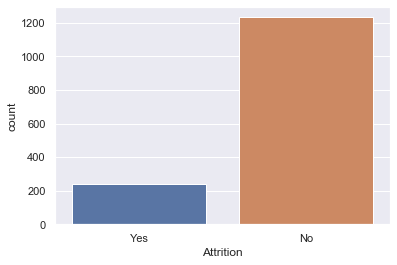

In [12]:
sns.countplot(x ='Attrition', data = df)


# Looking at the plot we can say that the total number of NO is more than the number of yes in the dataset. As it only returns the count based off a categorical column, we need to specify only the x parameter.

In [13]:
# df.groupby(["Attrition","Age"]).plot(kind='bar')

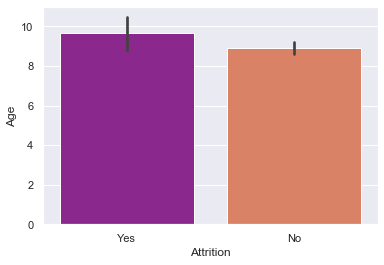

In [14]:
sns.barplot(x ="Attrition", y ="Age", data = df,  
            palette ='plasma', estimator = np.std) 


# Looking at the plot we can say that the average AGE for the yes is more as compared to the female.

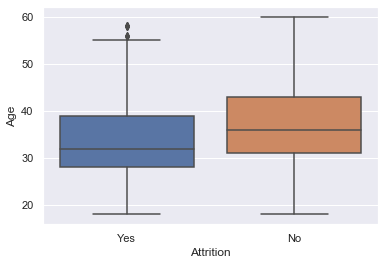

In [15]:
sns.boxplot(x ="Attrition", y ="Age", data = df)

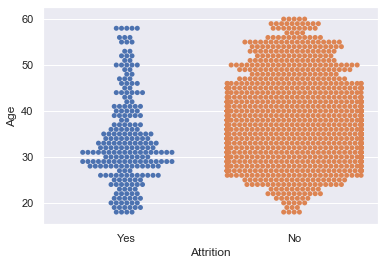

In [16]:

sns.swarmplot(x ="Attrition", y ="Age", data = df) 


# This Show That There Are Some Outlier In Age Factor Which Spoils Our Average 

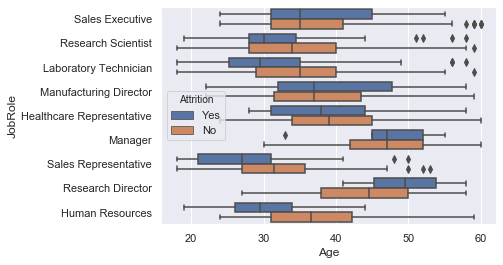

In [17]:
sns.boxplot(y ='JobRole', x ="Age", data = df, hue ="Attrition")

# Here We Can See That There Are Some Job Role Which Have Higher Attrition  Which We Need To Focus If We Want To Stop Attrition Like  Sales And Research Director

In [18]:
df2.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

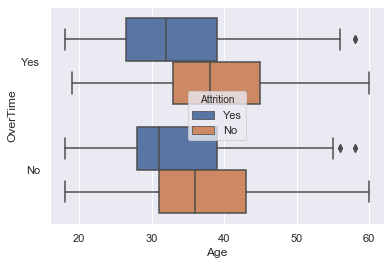

In [19]:
sns.boxplot(y ='OverTime', x ="Age", data = df, hue ="Attrition")

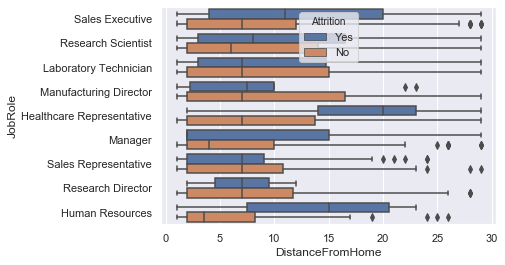

In [20]:
sns.boxplot(y ='JobRole', x ='DistanceFromHome', data = df, hue ="Attrition")

# Distance From Home Is Highly Responsible For Attrition

# In The Below Graph Just Focus On Line Which Helps To Predict The Data¶

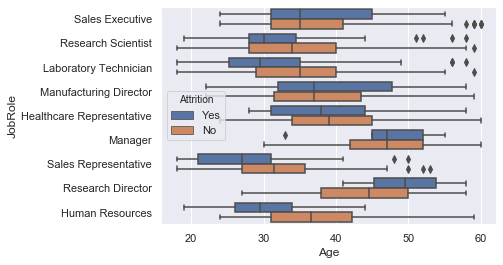

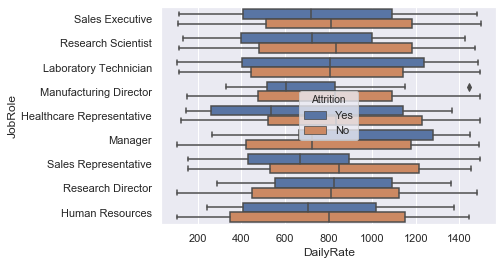

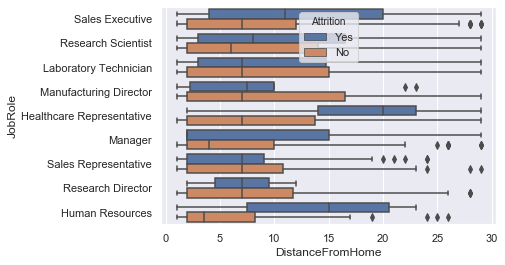

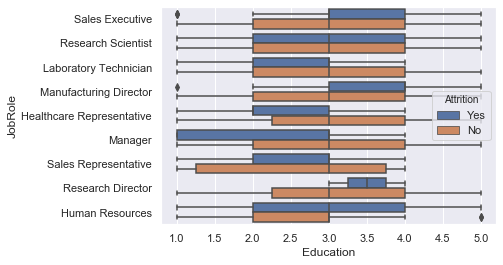

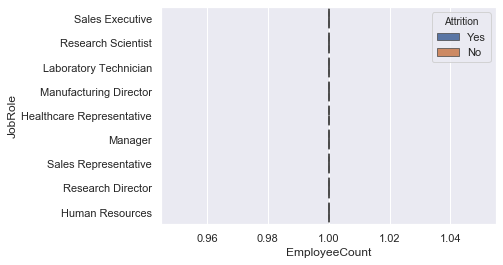

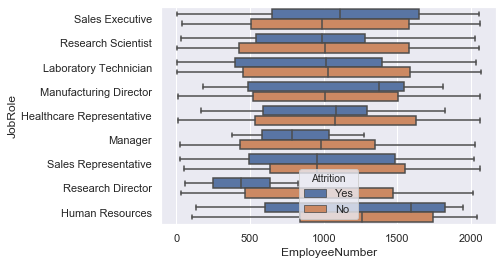

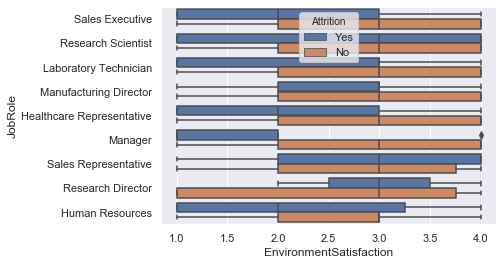

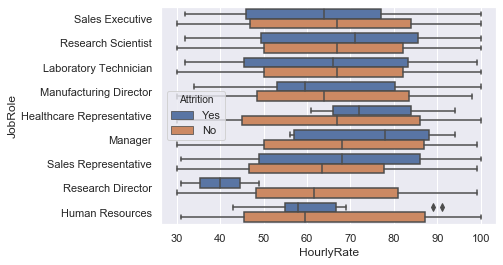

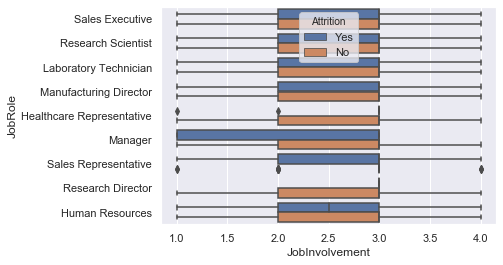

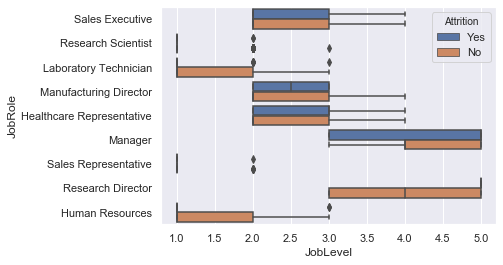

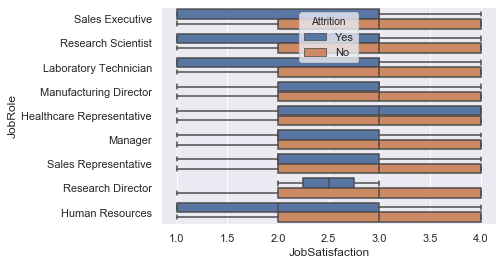

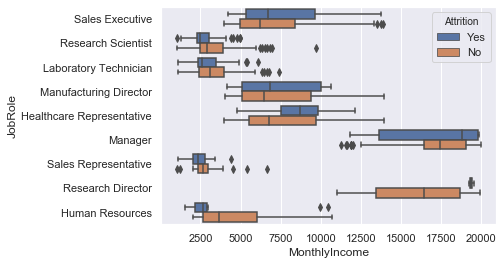

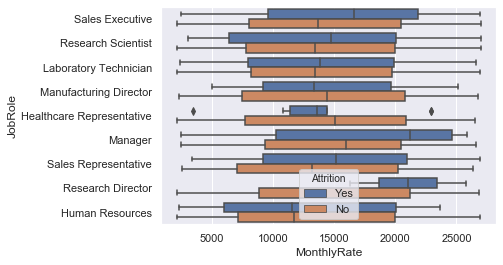

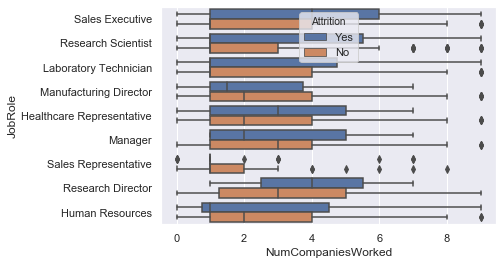

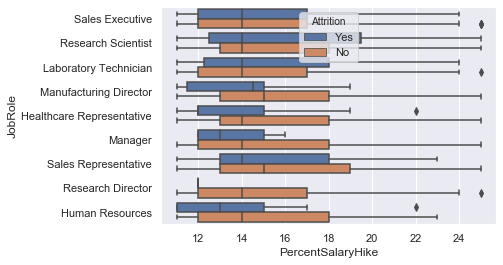

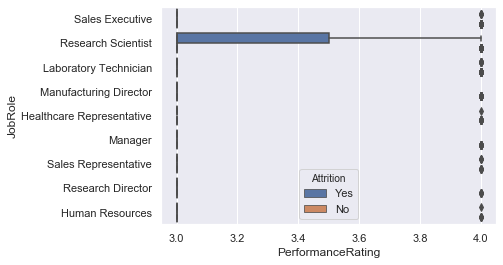

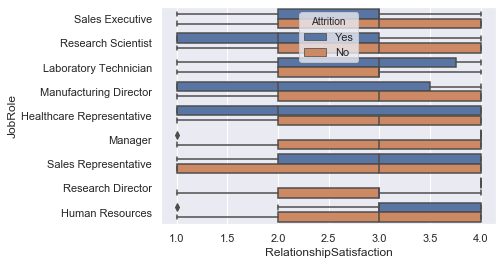

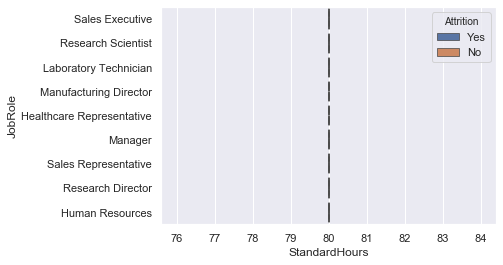

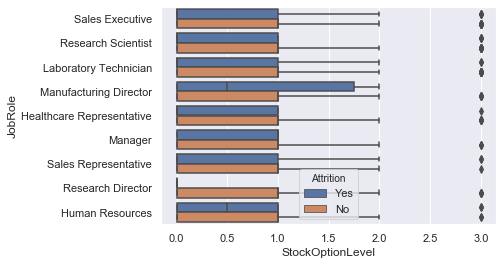

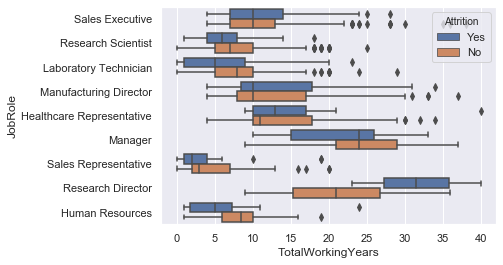

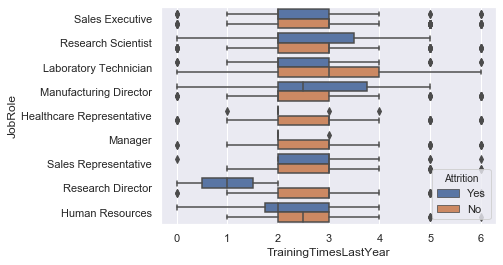

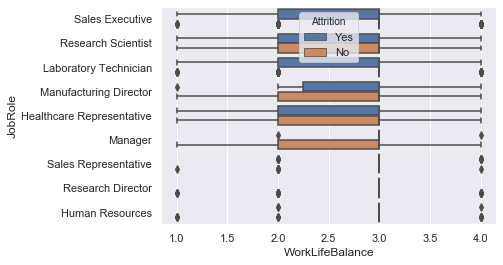

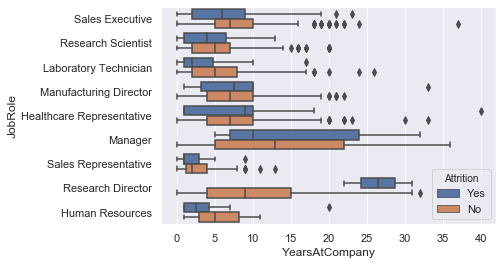

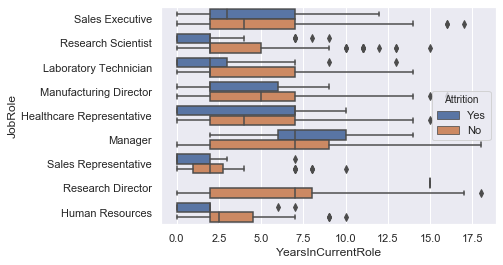

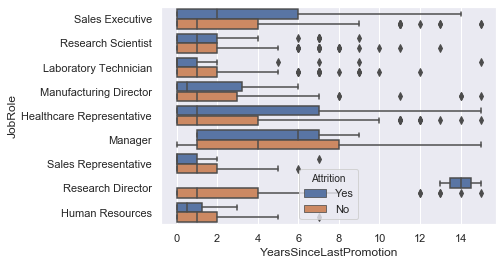

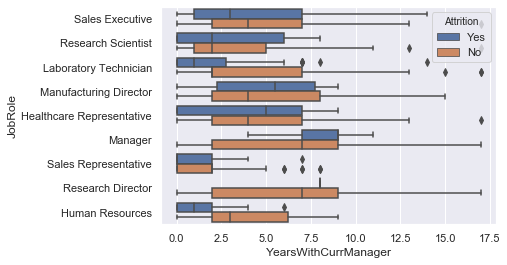

In [21]:
for i in df2:
    plt.figure()
    sns.boxplot(y ='JobRole', x =i, data = df, hue ="Attrition")
    plt.show()

# In Above Graph Monthlyrate Can Be A Reason For Higher Attration

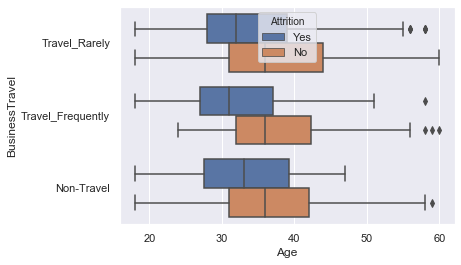

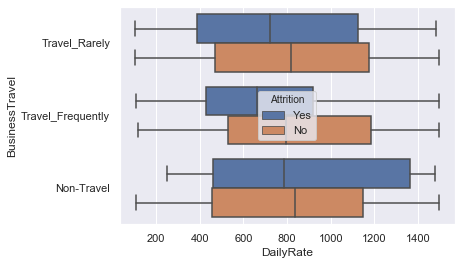

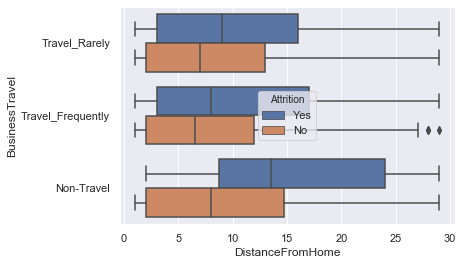

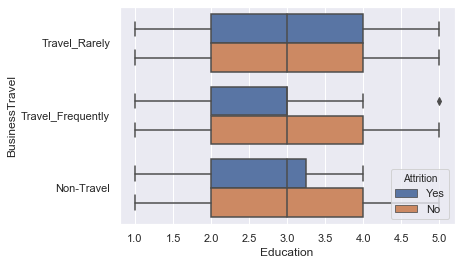

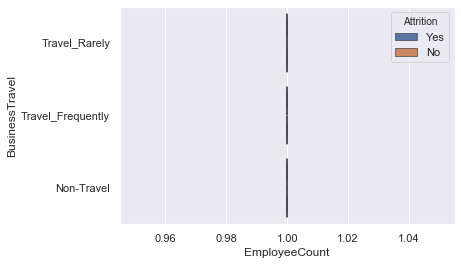

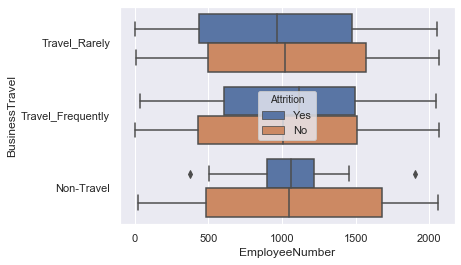

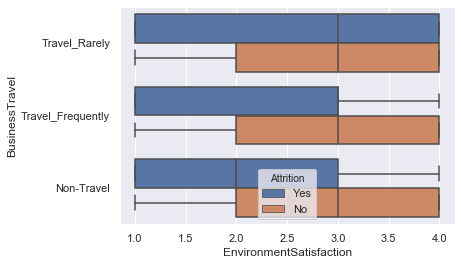

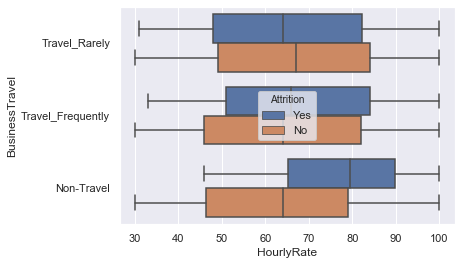

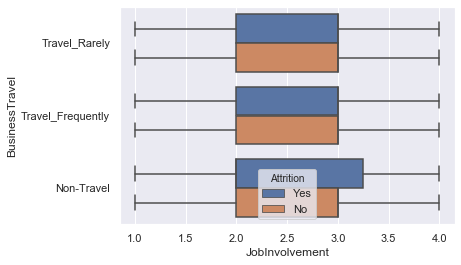

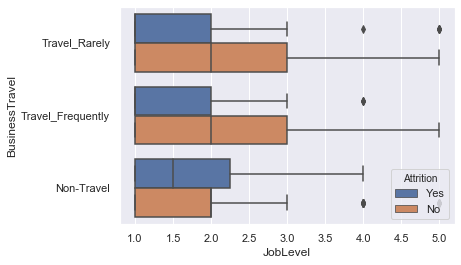

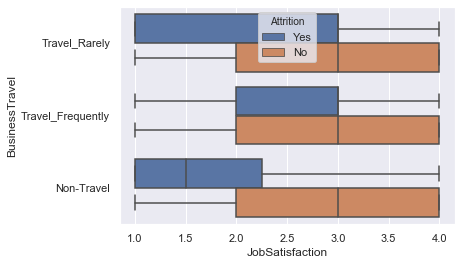

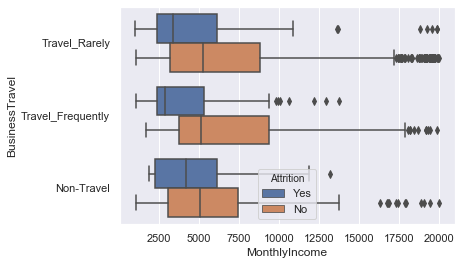

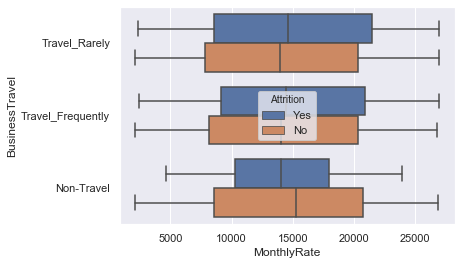

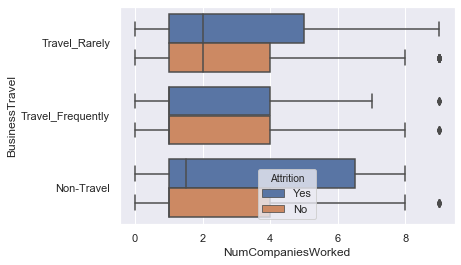

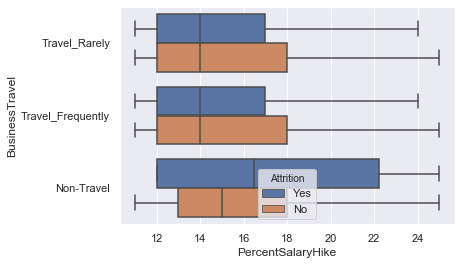

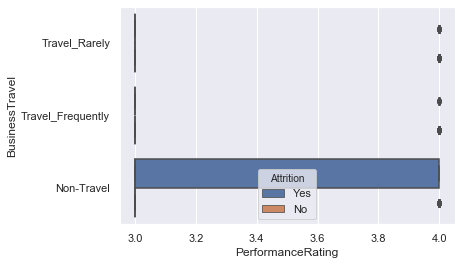

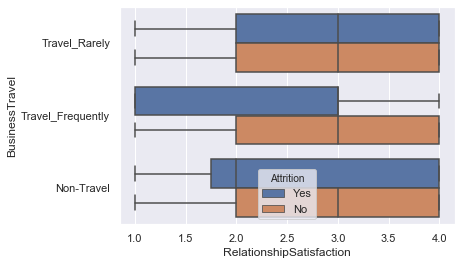

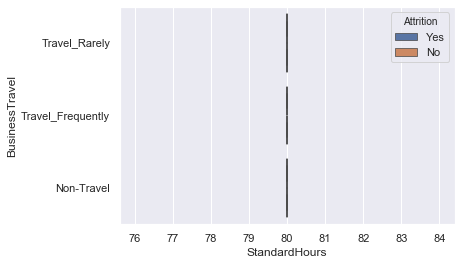

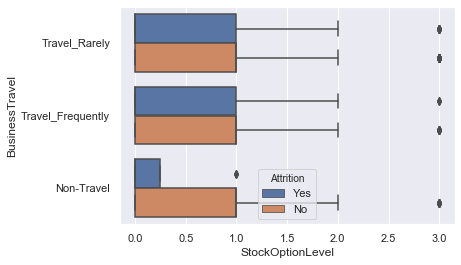

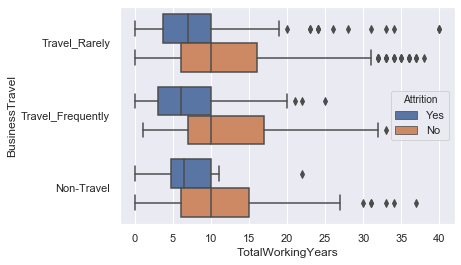

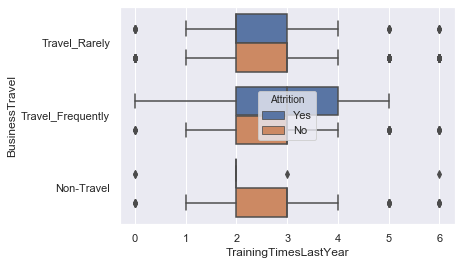

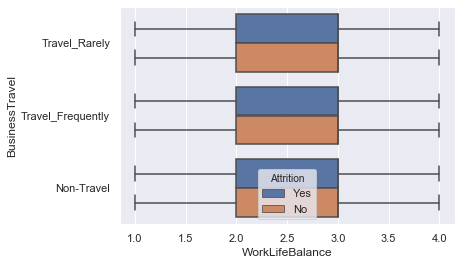

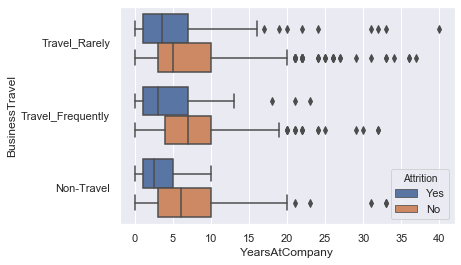

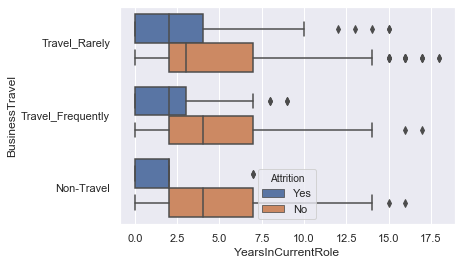

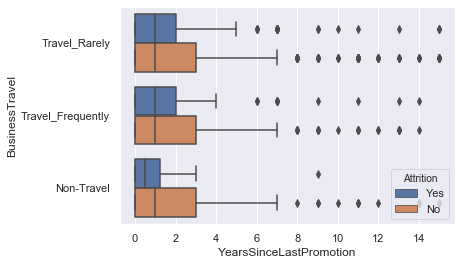

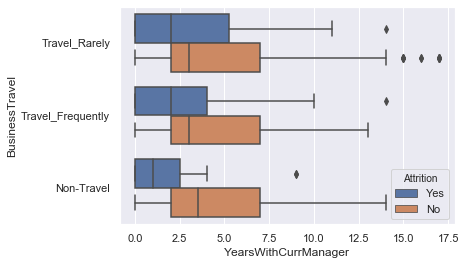

In [22]:
for i in df2:
    plt.figure()
    sns.boxplot(y ='BusinessTravel', x =i, data = df, hue ="Attrition")
    plt.show()

# In Above Graph Distance From Home Is Responsible

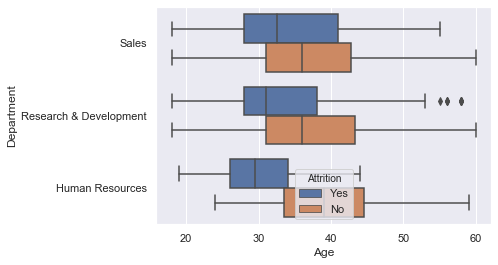

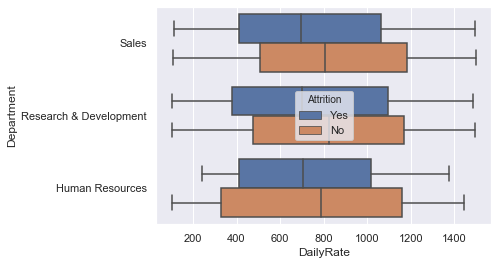

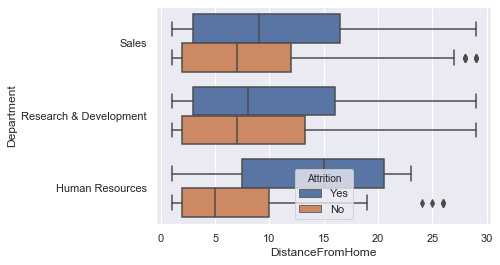

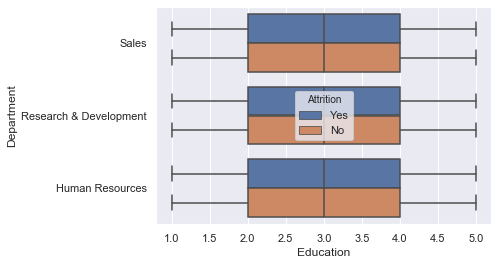

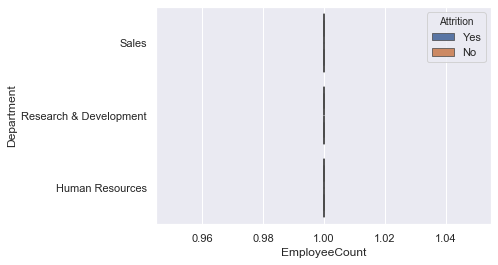

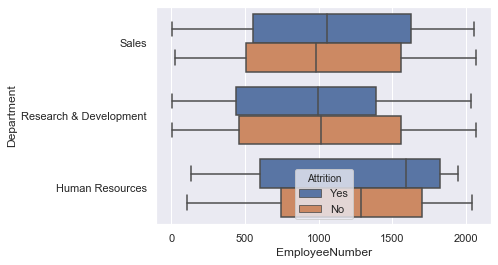

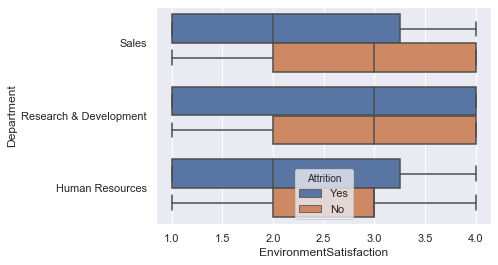

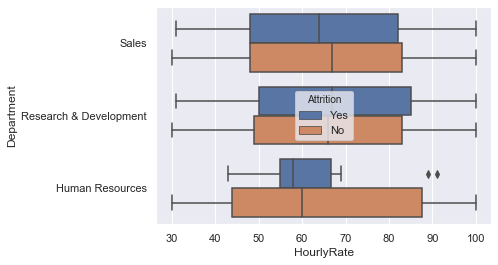

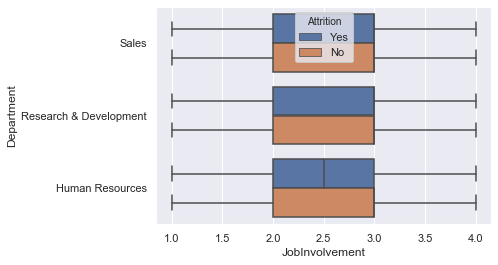

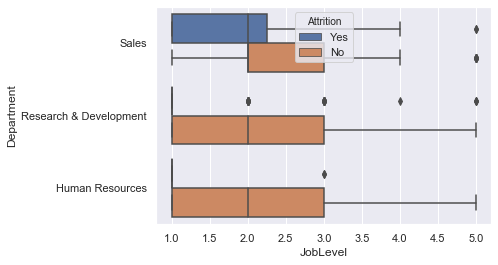

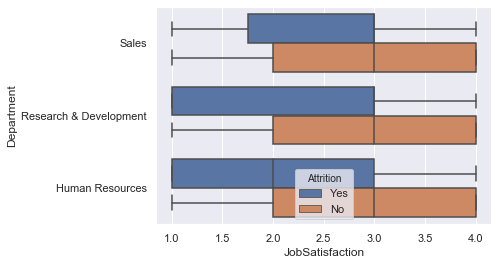

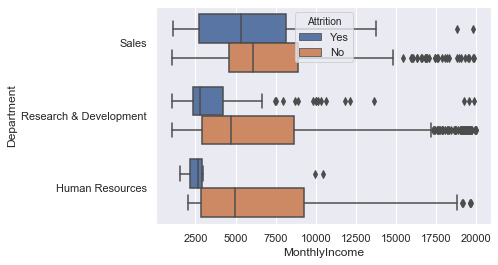

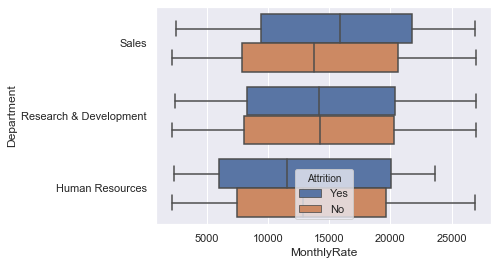

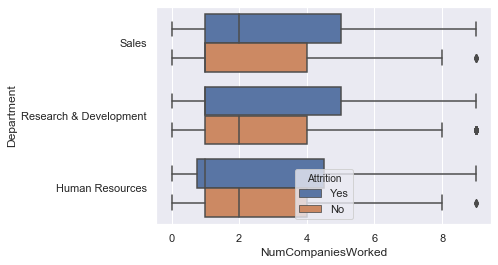

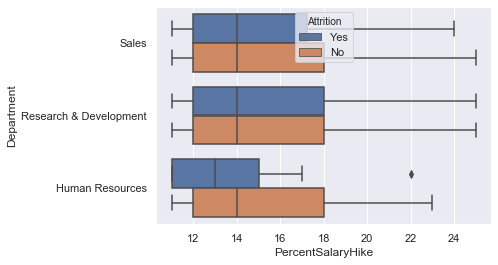

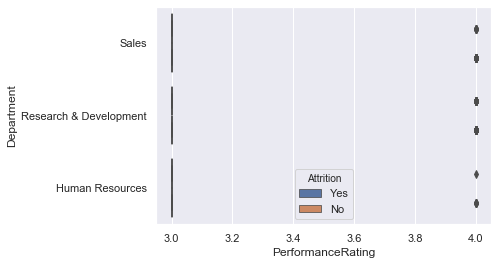

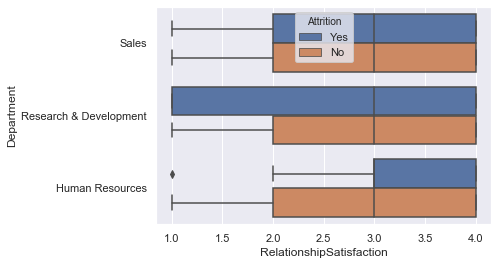

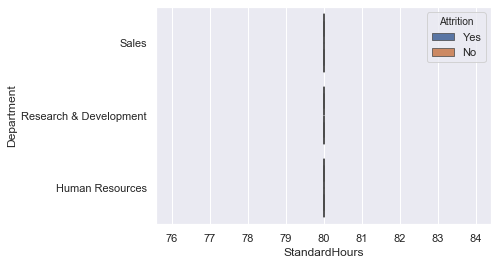

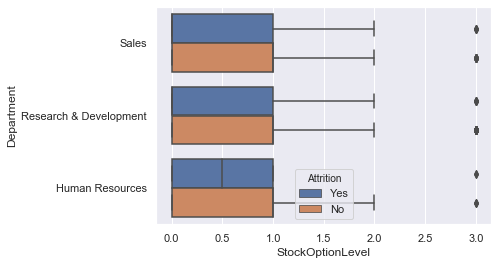

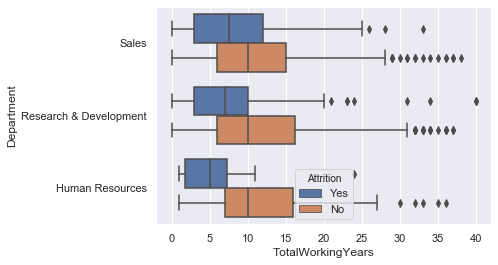

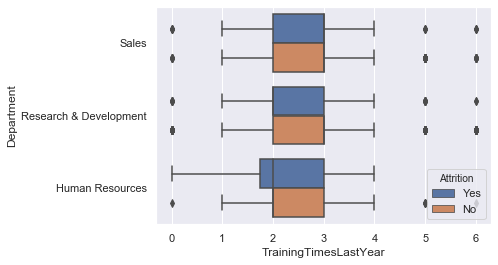

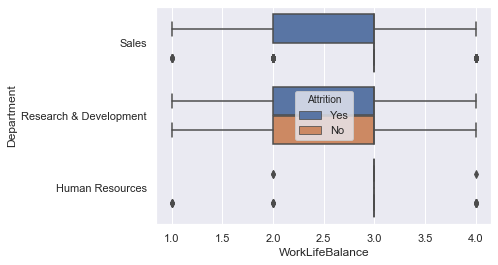

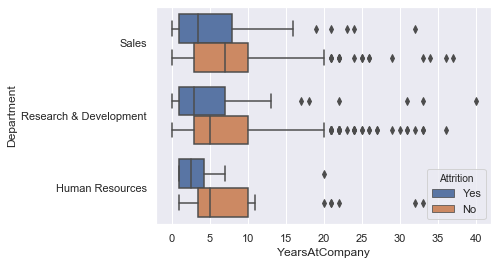

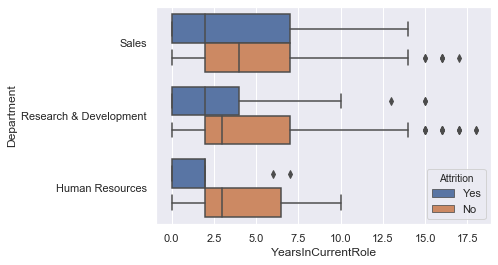

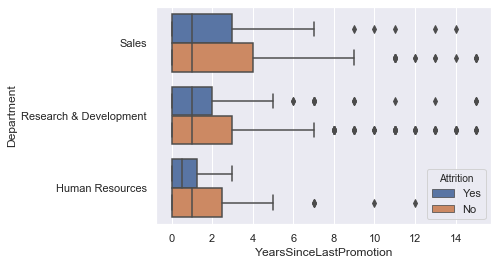

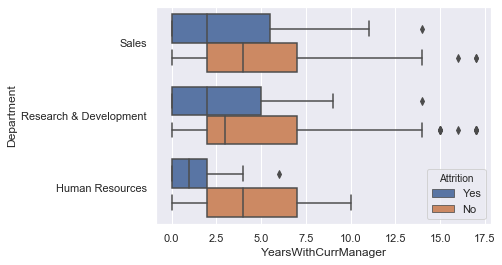

In [23]:
for i in df2:
    plt.figure()
    sns.boxplot(y ='Department', x =i, data = df, hue ="Attrition")
    plt.show()

# In Department People Who Have Distance From Home,Employe Number Have High Attration

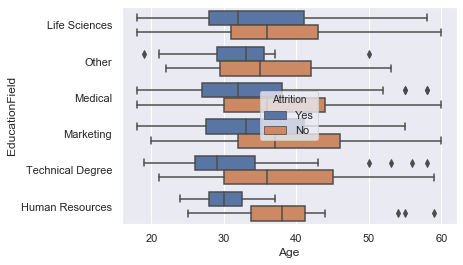

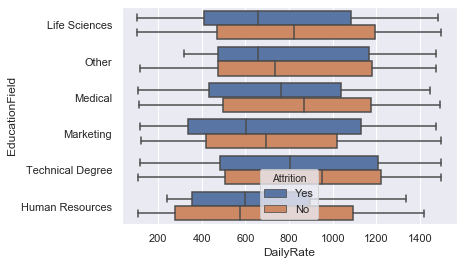

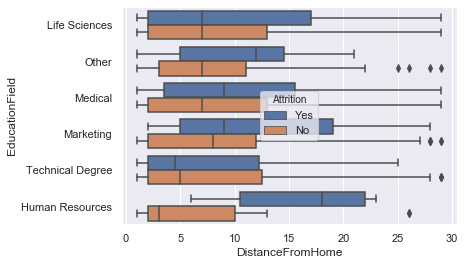

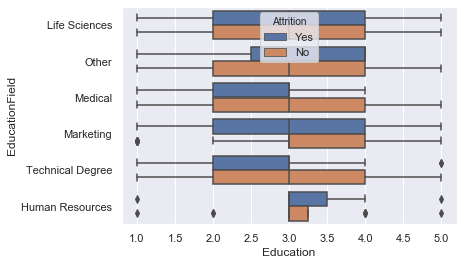

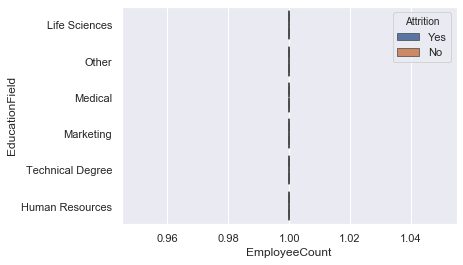

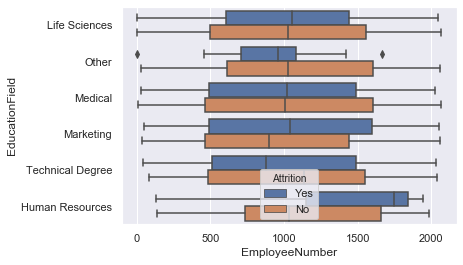

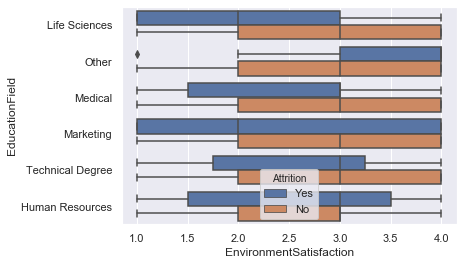

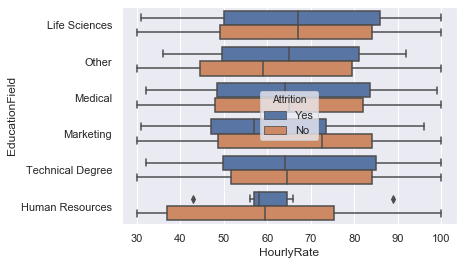

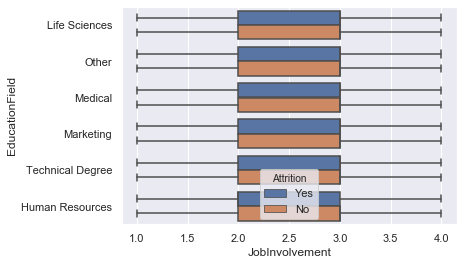

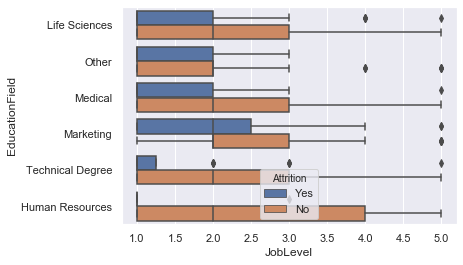

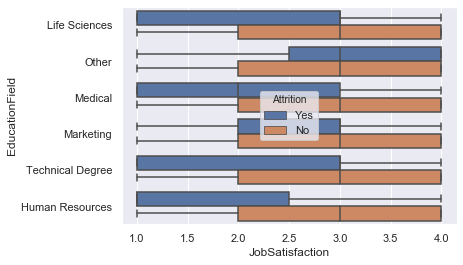

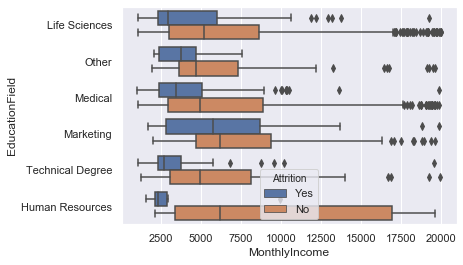

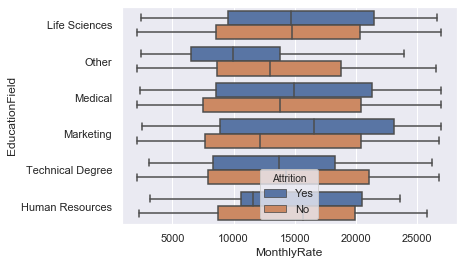

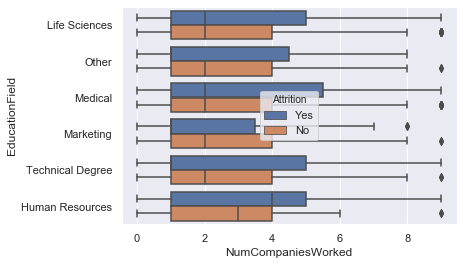

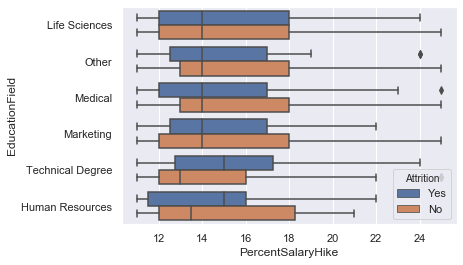

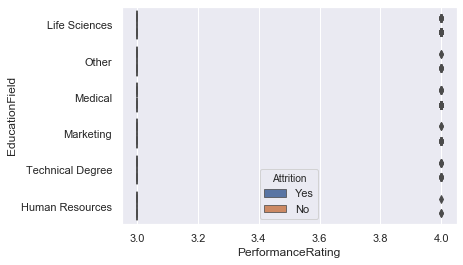

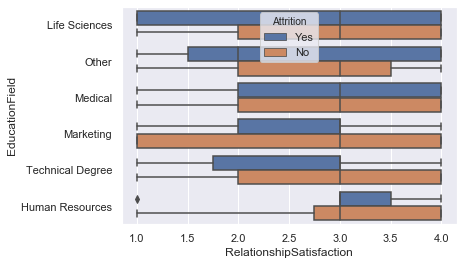

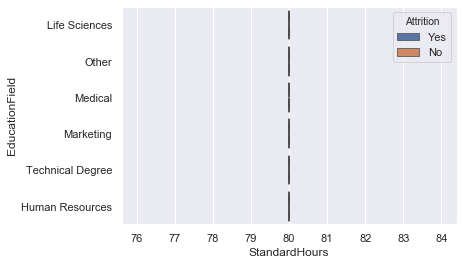

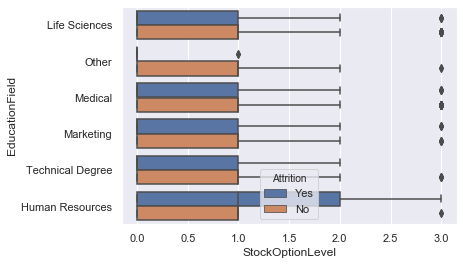

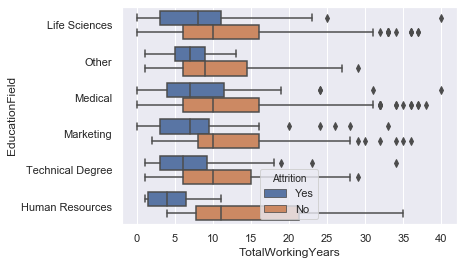

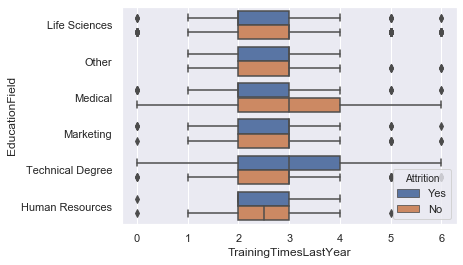

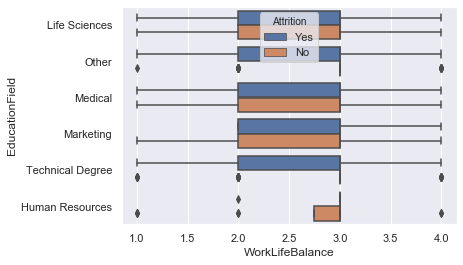

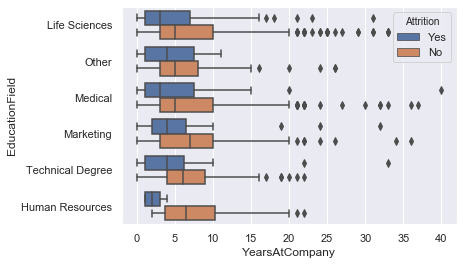

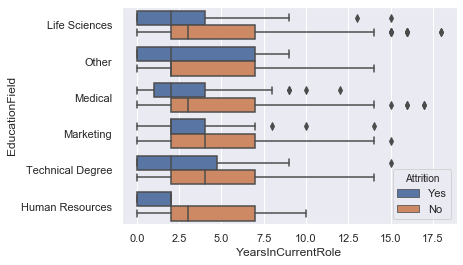

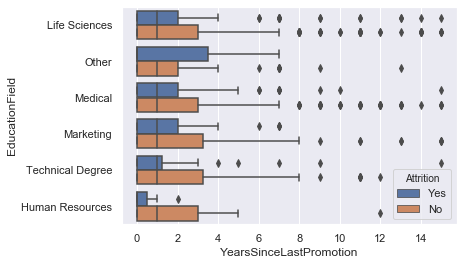

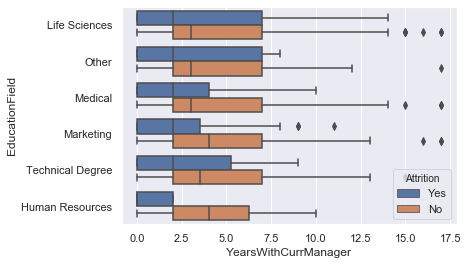

In [24]:
for i in df2:
    plt.figure()
    sns.boxplot(y ='EducationField', x =i, data = df, hue ="Attrition")
    plt.show()

# People With Different Education Field With Monthly Rate And Distance From Home Have High Attration

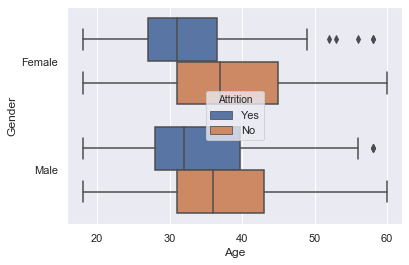

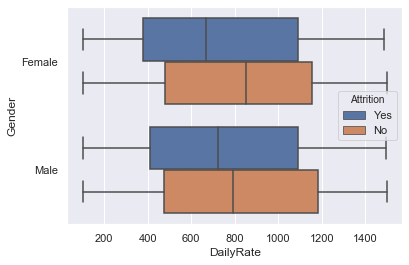

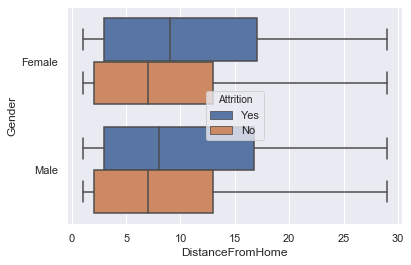

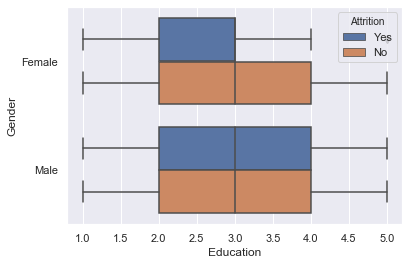

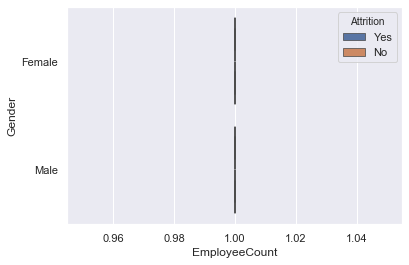

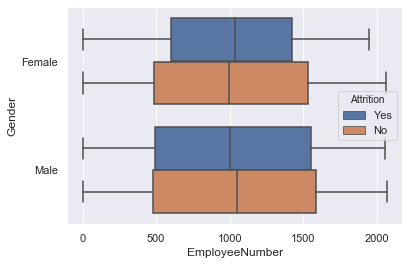

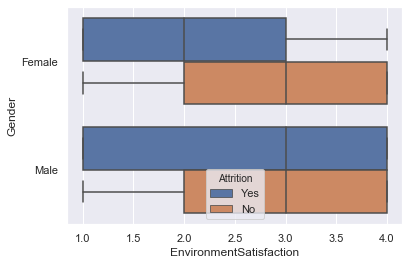

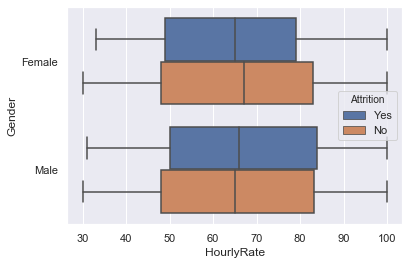

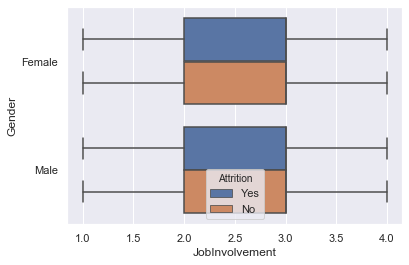

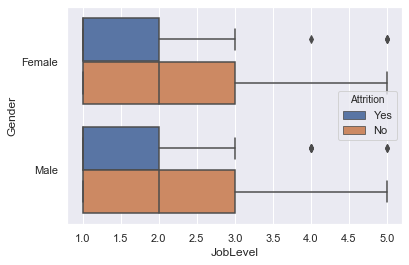

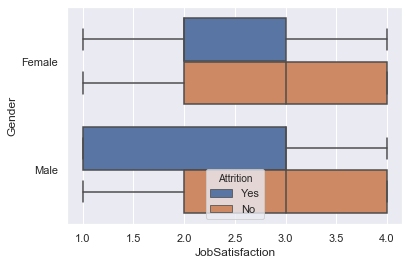

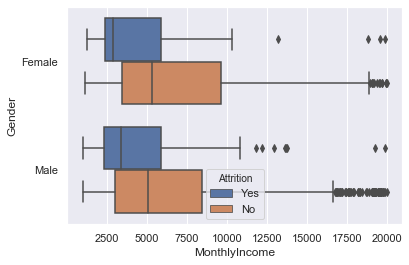

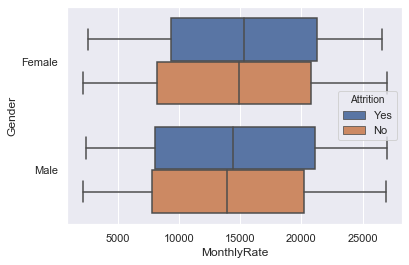

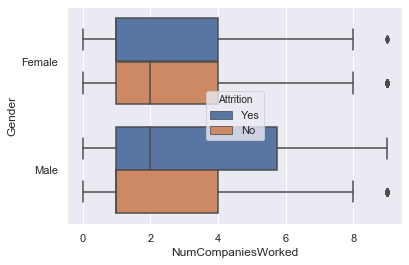

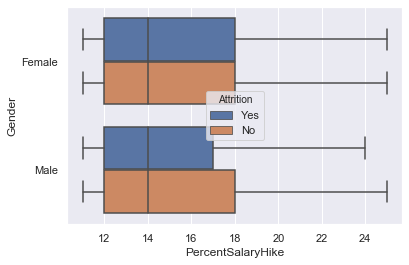

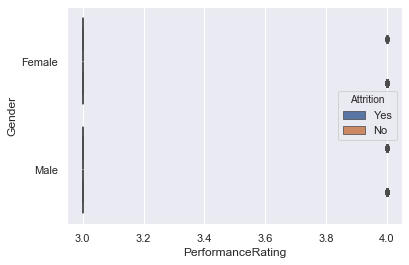

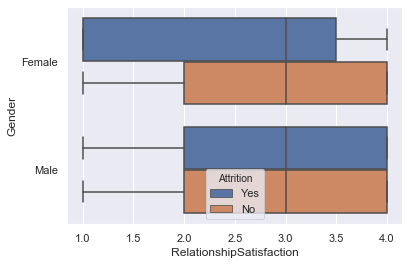

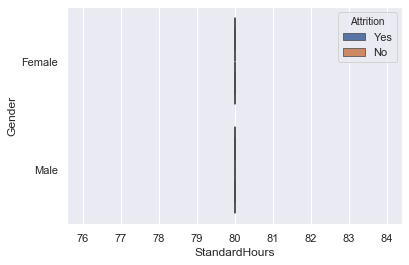

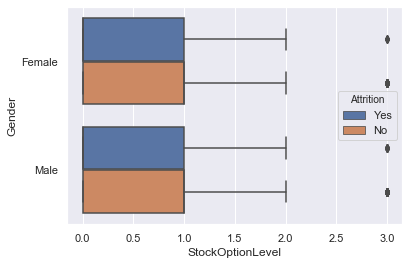

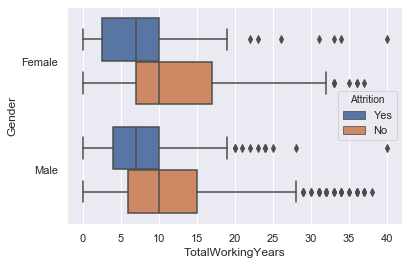

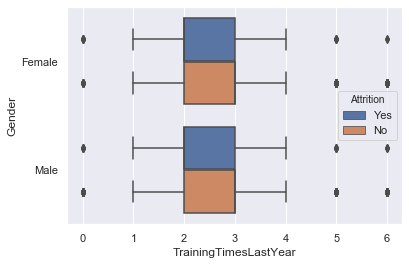

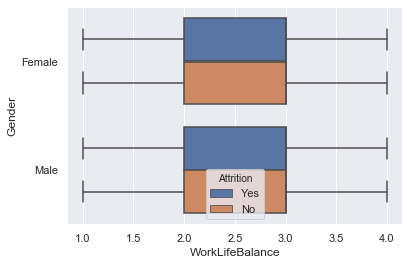

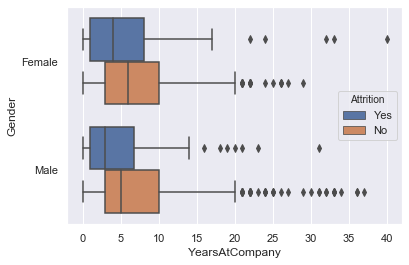

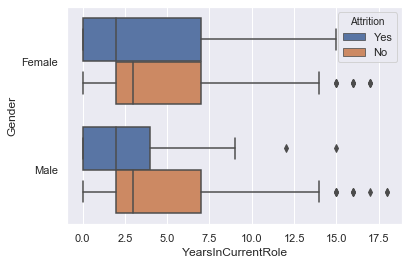

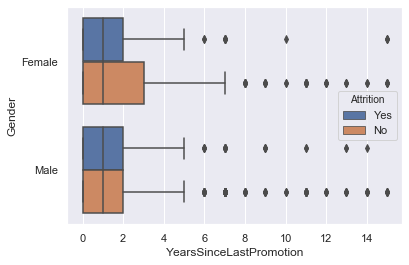

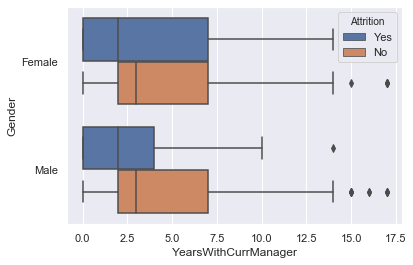

In [25]:
for i in df2:
    plt.figure()
    sns.boxplot(y ='Gender', x =i, data = df, hue ="Attrition")
    plt.show()

# Distance From Home Again Have High Attration Rate

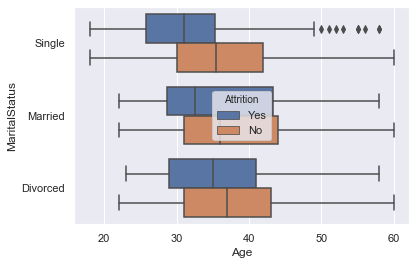

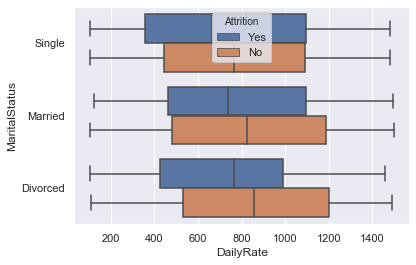

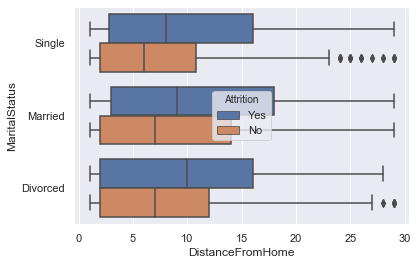

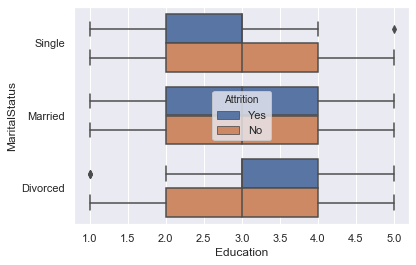

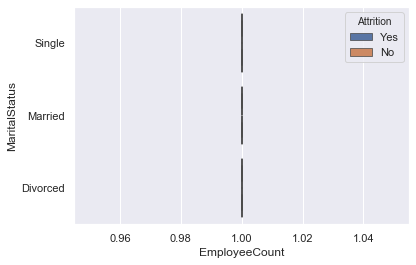

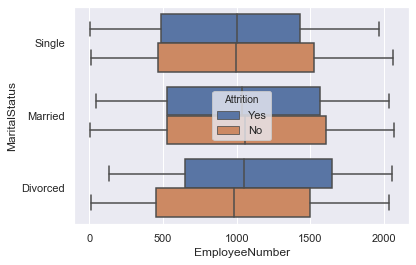

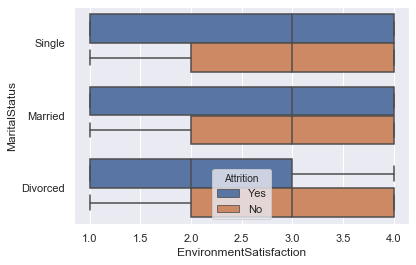

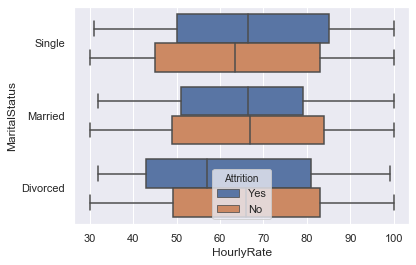

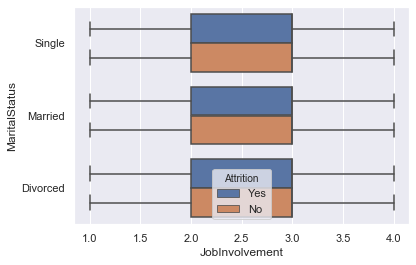

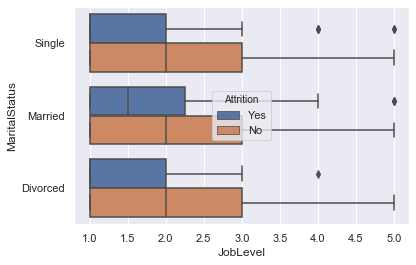

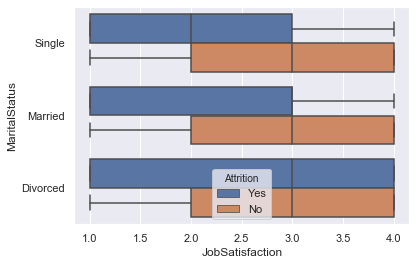

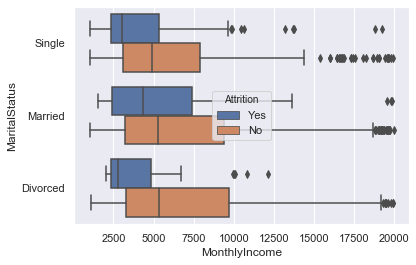

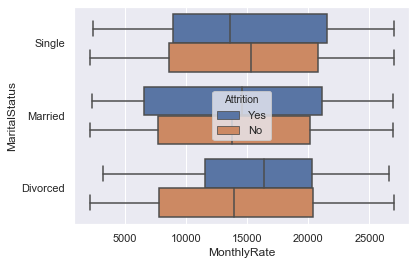

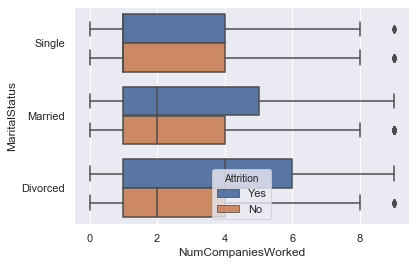

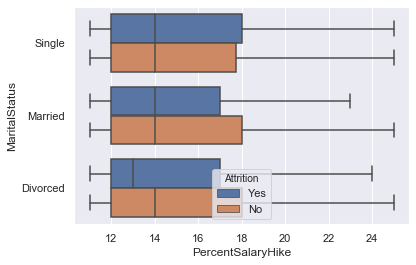

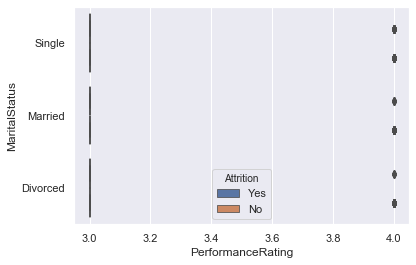

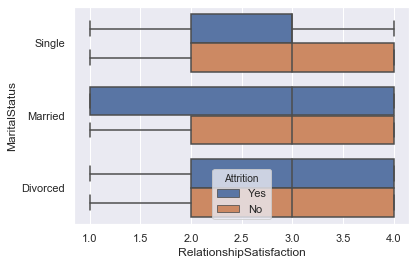

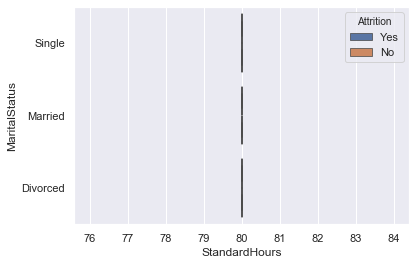

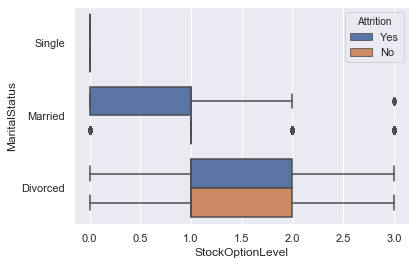

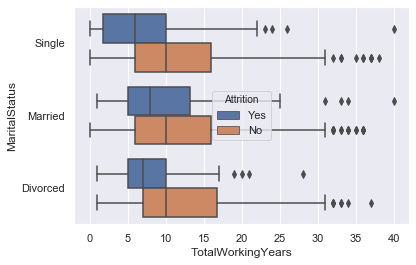

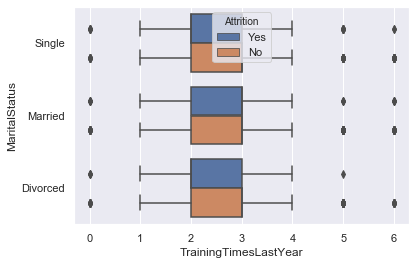

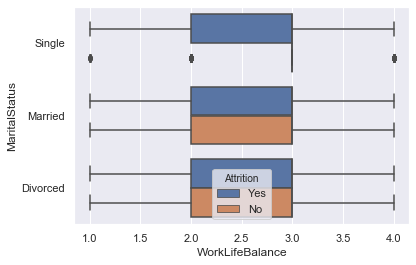

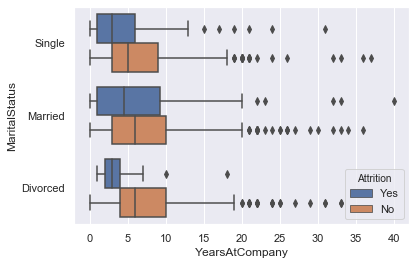

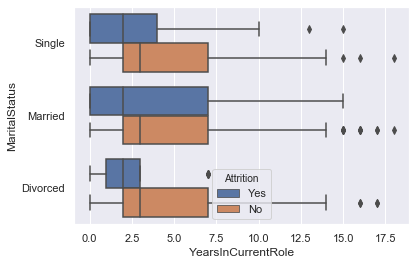

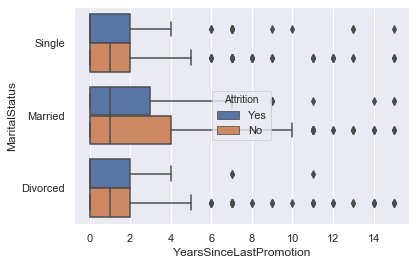

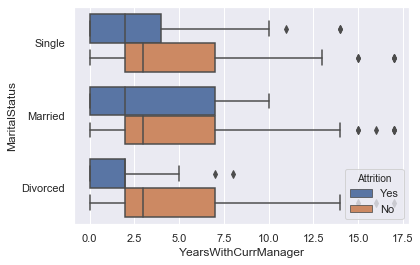

In [26]:
for i in df2:
    plt.figure()
    sns.boxplot(y ='MaritalStatus', x =i, data = df, hue ="Attrition")
    plt.show()

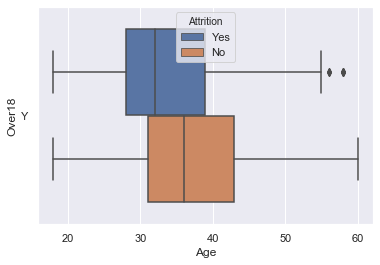

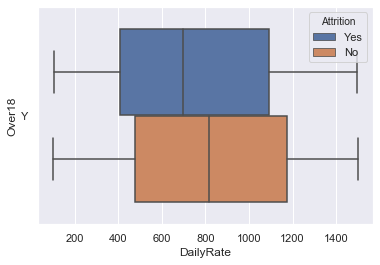

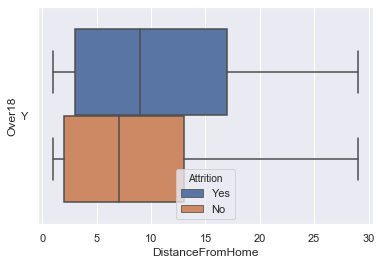

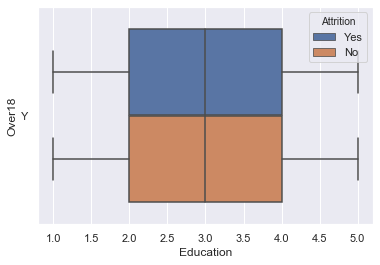

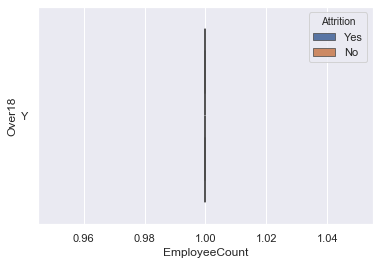

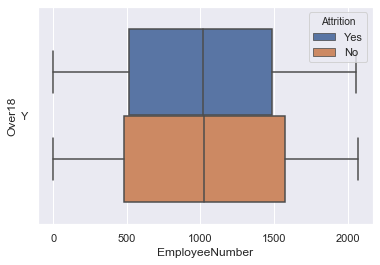

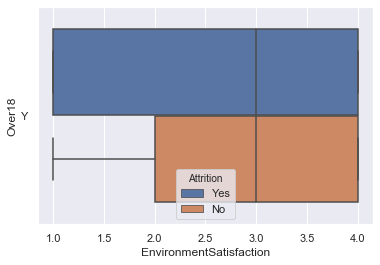

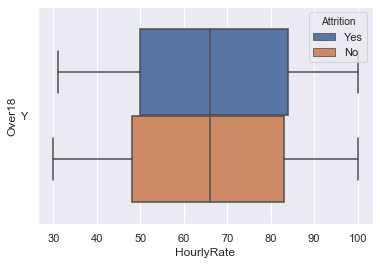

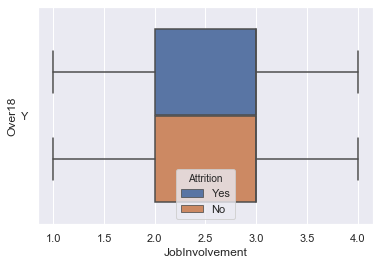

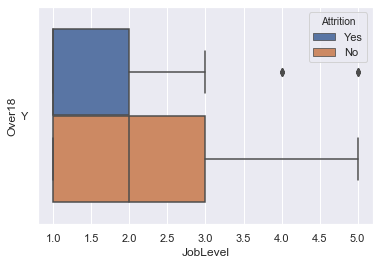

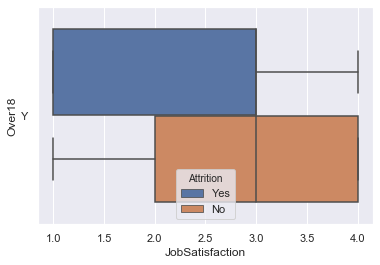

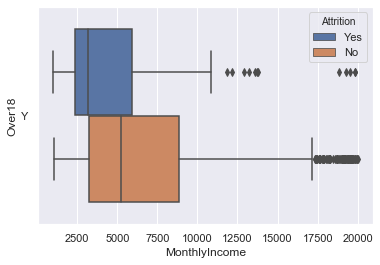

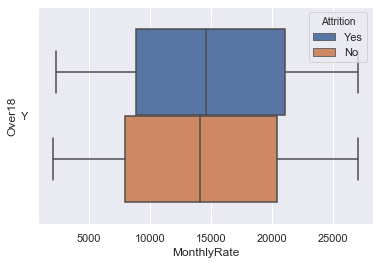

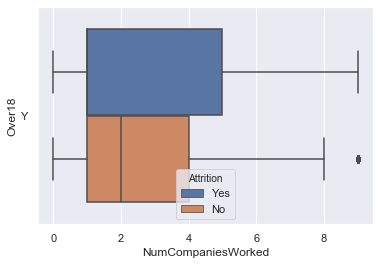

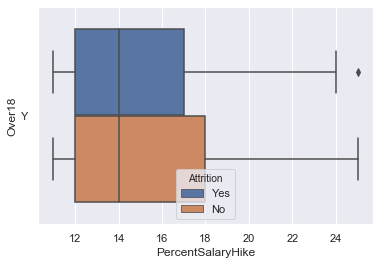

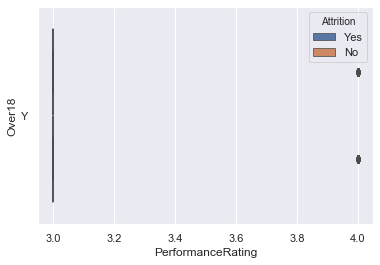

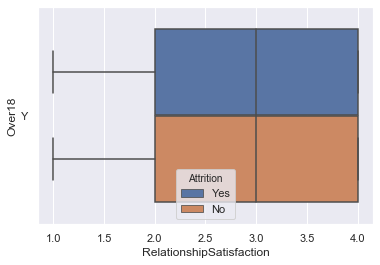

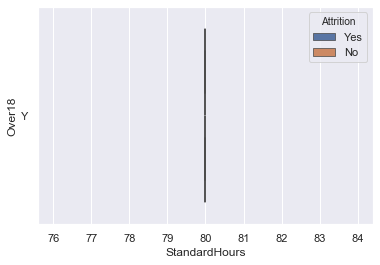

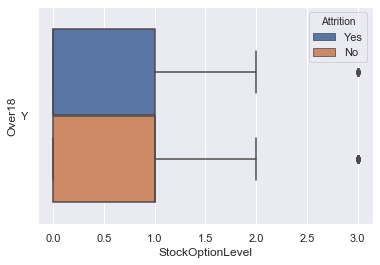

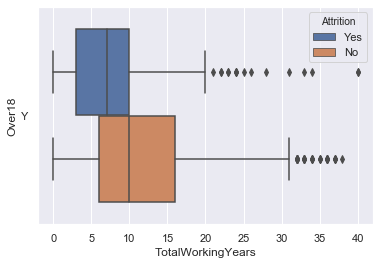

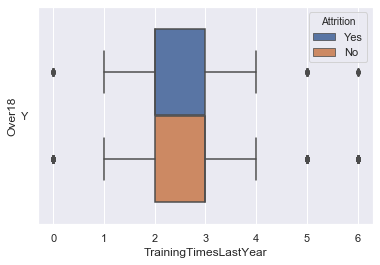

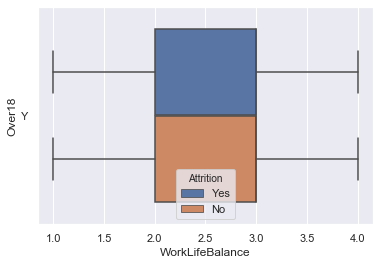

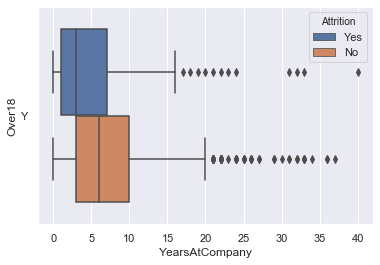

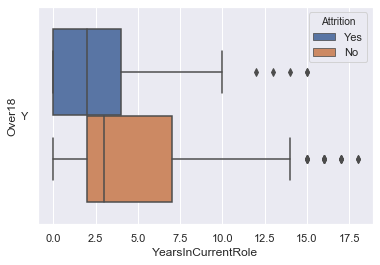

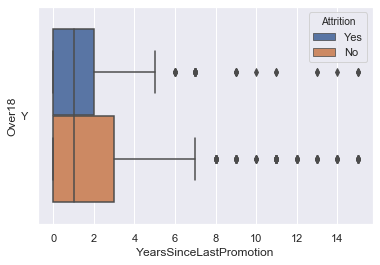

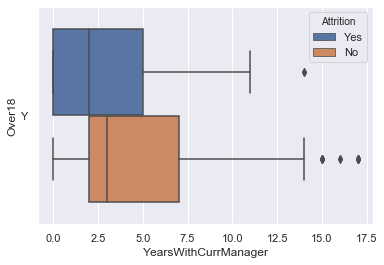

In [27]:
for i in df2:
    plt.figure()
    sns.boxplot(y ='Over18', x =i, data = df, hue ="Attrition")
    plt.show()

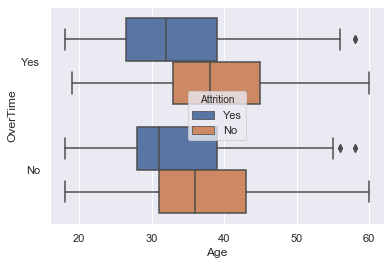

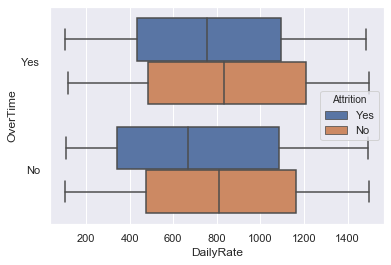

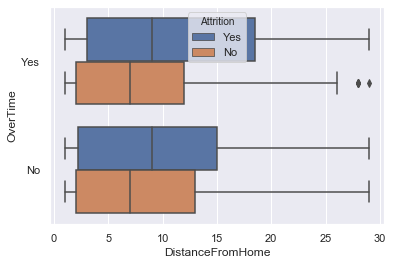

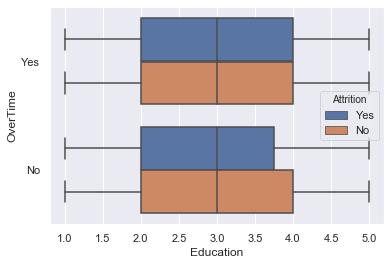

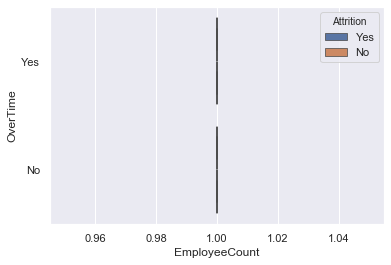

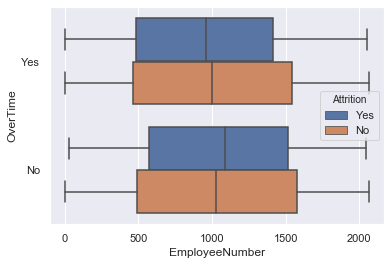

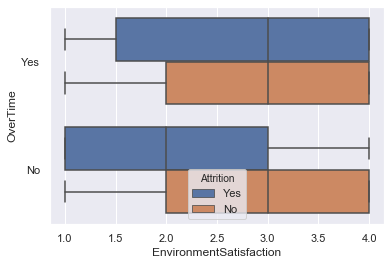

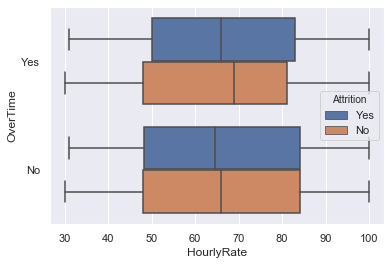

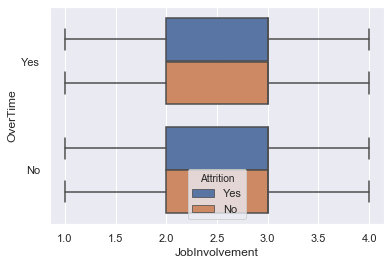

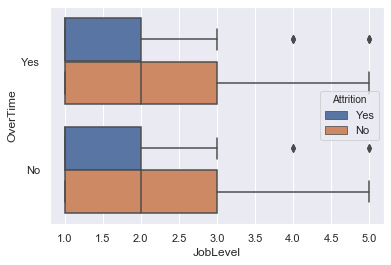

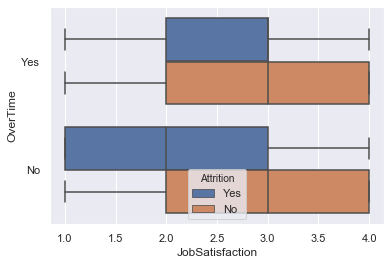

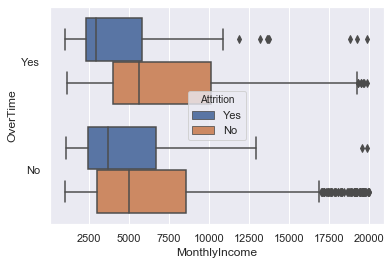

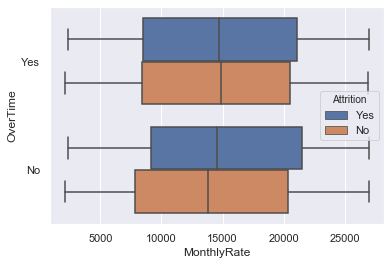

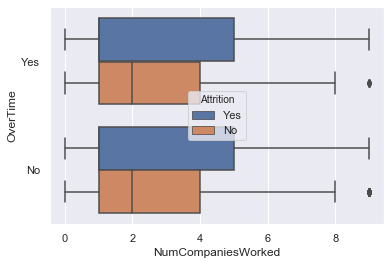

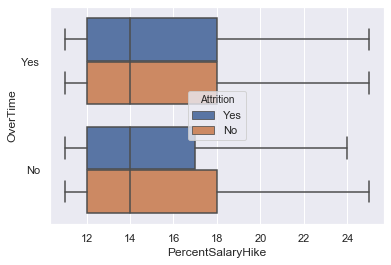

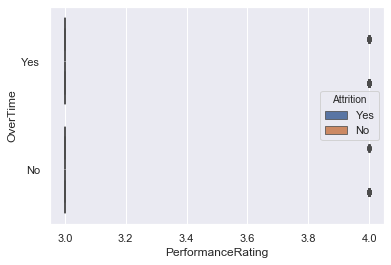

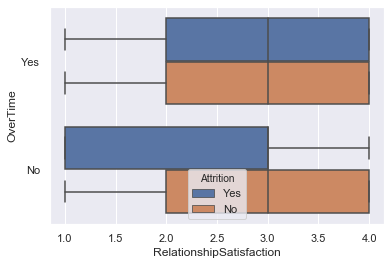

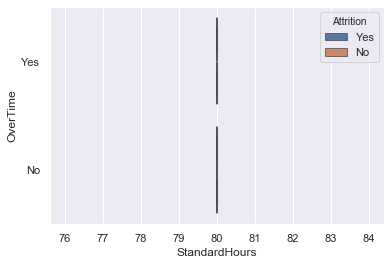

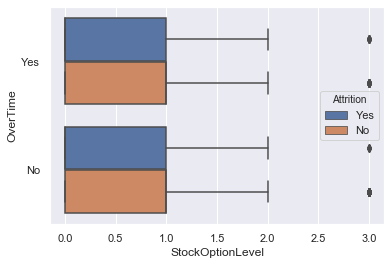

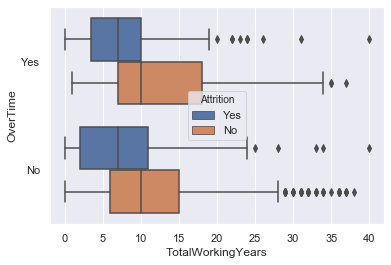

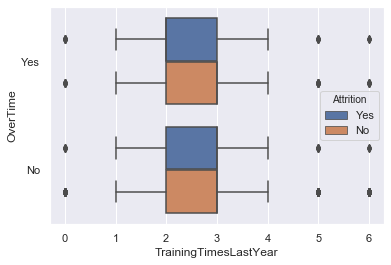

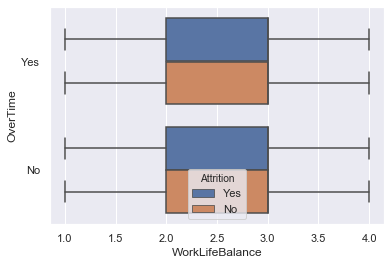

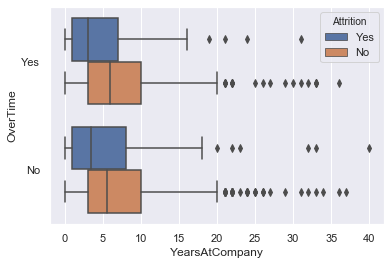

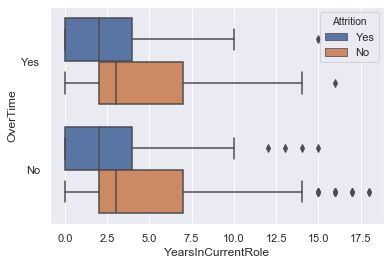

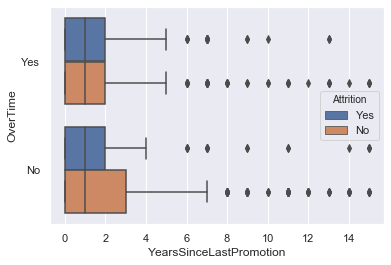

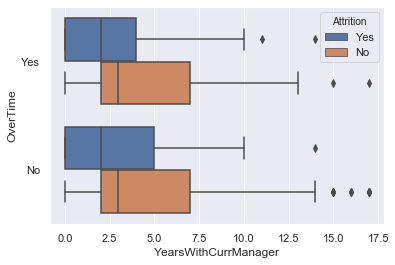

In [28]:
for i in df2:
    plt.figure()
    sns.boxplot(y ='OverTime', x =i, data = df, hue ="Attrition")
    plt.show()

# According To  The Below Vizluzation There Are The Major Attributes Which Is Affecting The Attration

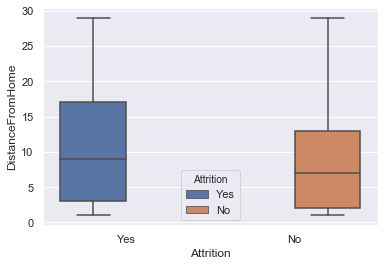

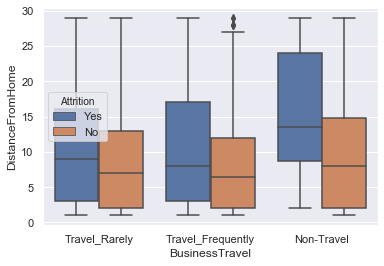

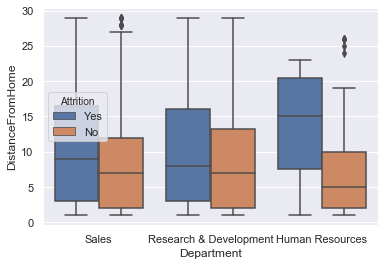

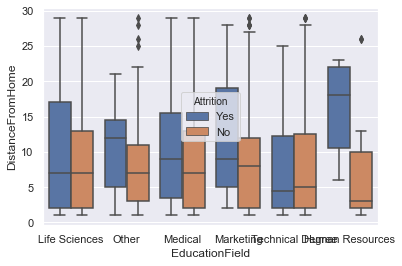

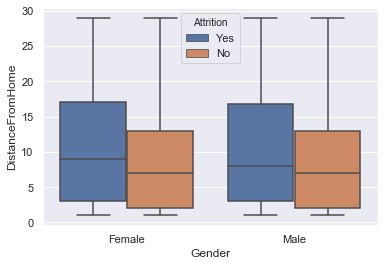

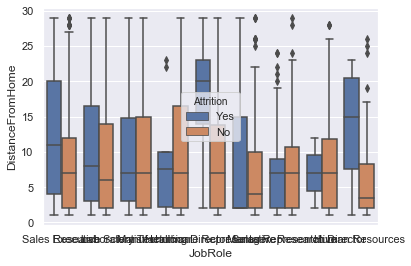

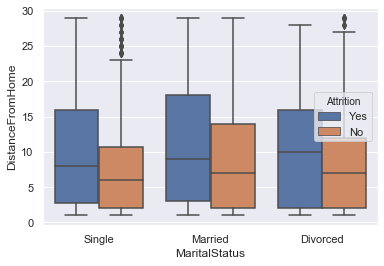

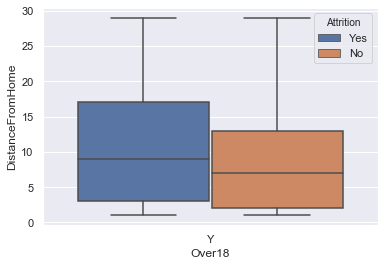

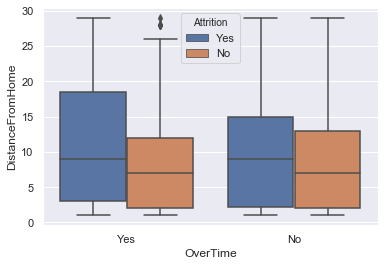

In [29]:
for i in df1:
    plt.figure()
    sns.boxplot(y ='DistanceFromHome', x =i, data = df, hue ="Attrition")
    plt.show()

# In Above Graphical Presenation We Can Clearly See That Distaance From Home Is Highly Resonsible 

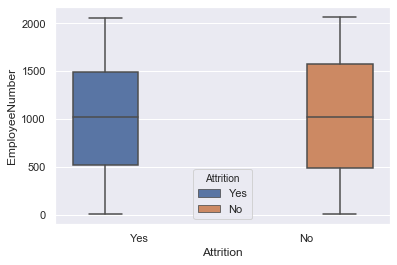

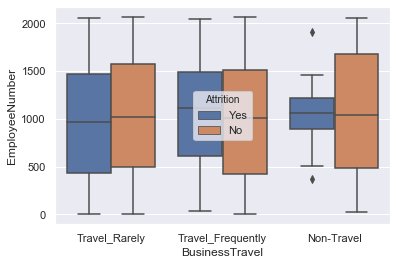

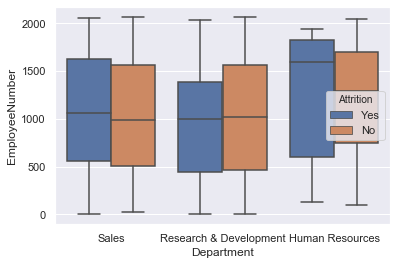

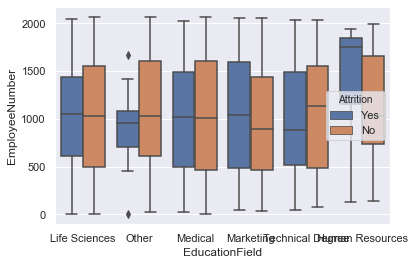

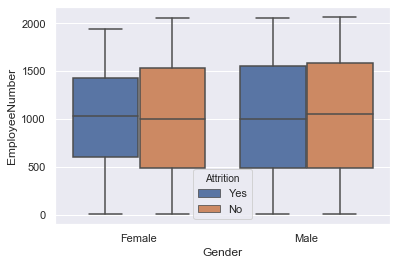

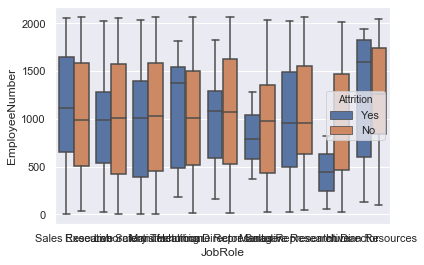

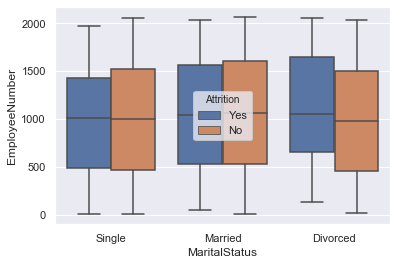

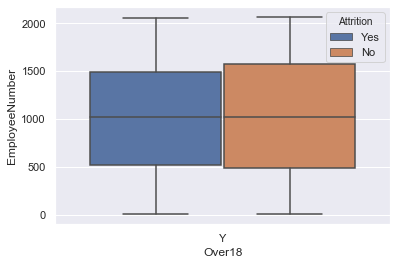

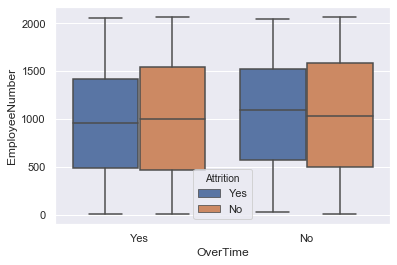

In [30]:
for i in df1:
    plt.figure()
    sns.boxplot(y ='EmployeeNumber', x =i, data = df, hue ="Attrition")
    plt.show()

# Employee Number Is Also Showing That Is Slightly Higher 

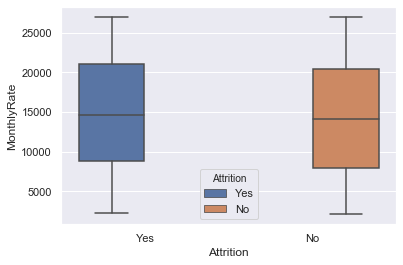

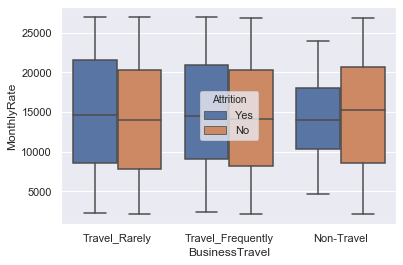

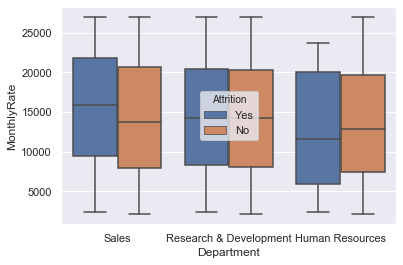

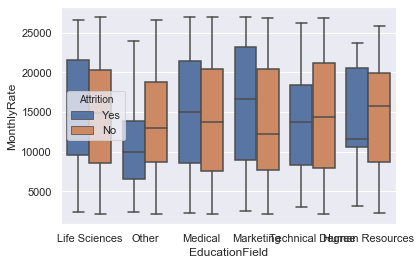

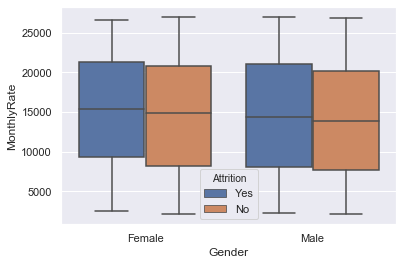

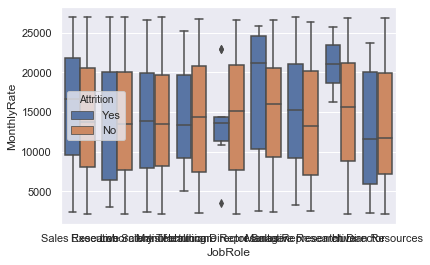

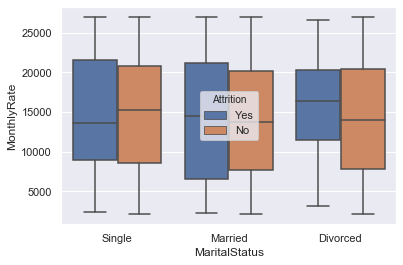

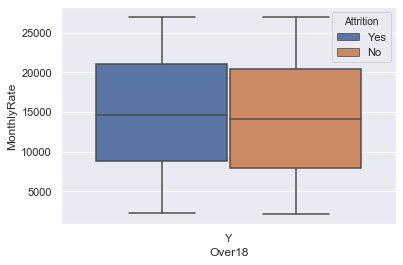

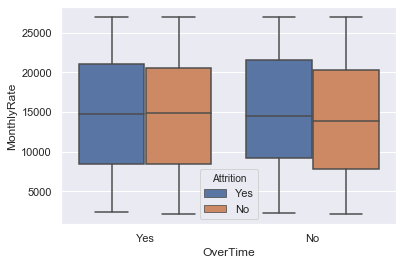

In [31]:
for i in df1:
    plt.figure()
    sns.boxplot(y ='MonthlyRate', x =i, data = df, hue ="Attrition")
    plt.show()

# Monthly Rate Is Also Showing That Is Slightly Higher 

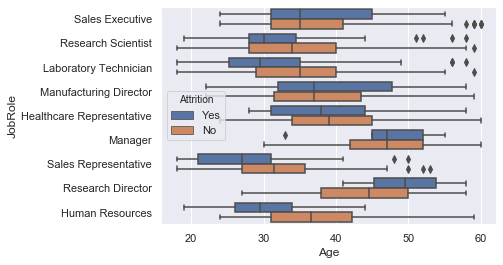

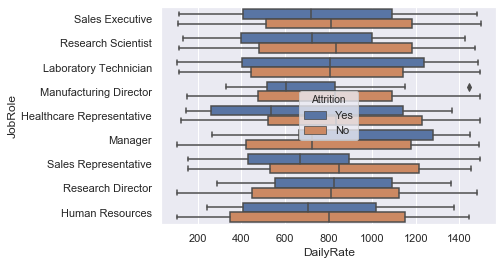

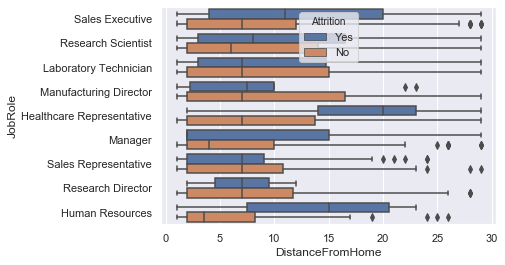

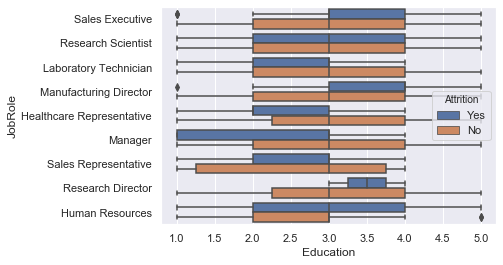

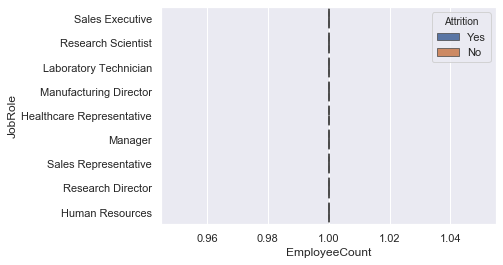

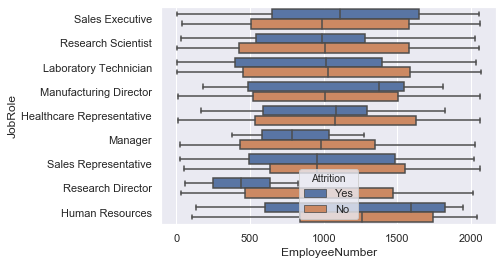

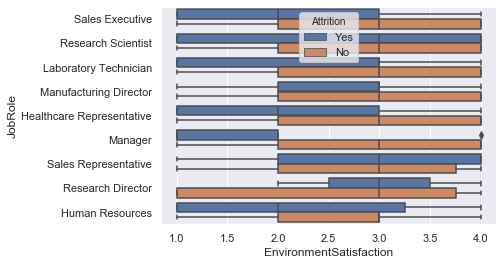

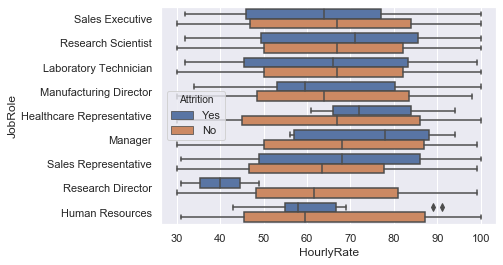

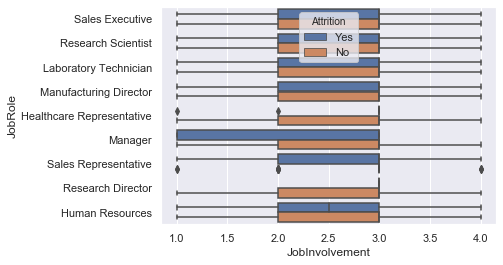

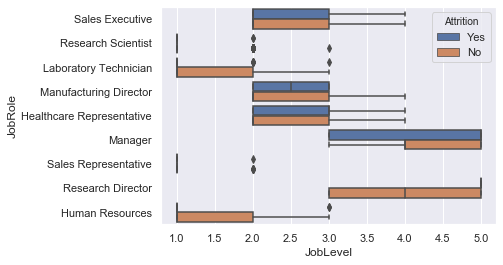

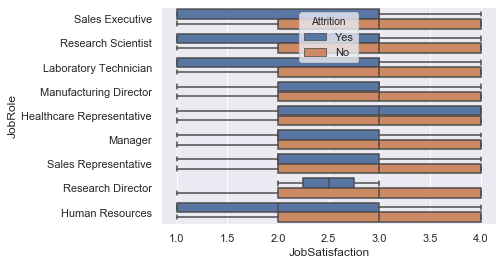

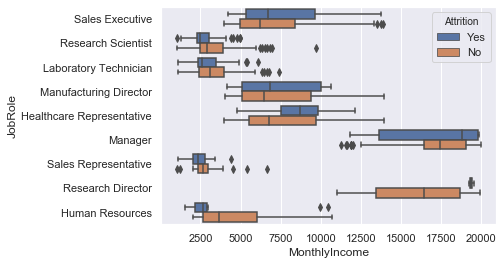

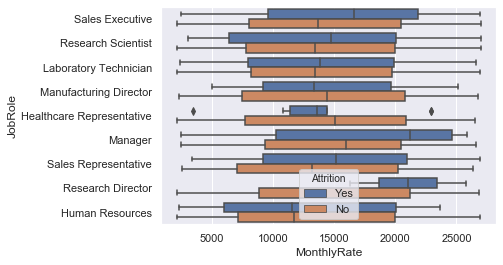

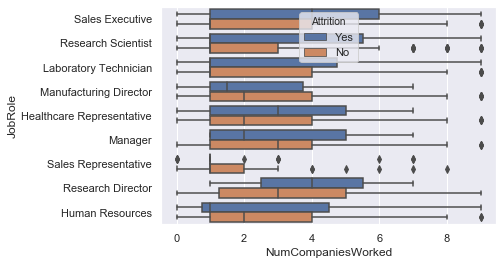

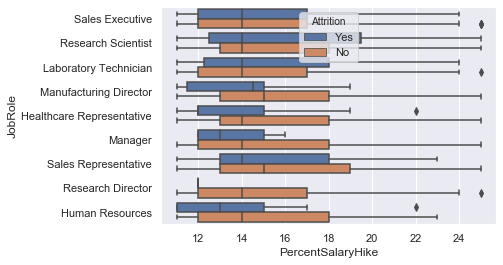

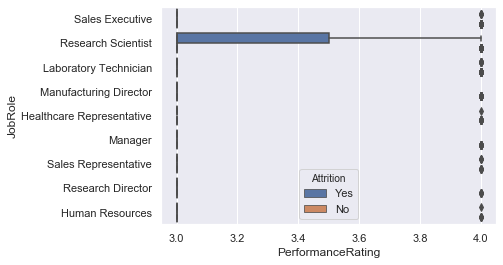

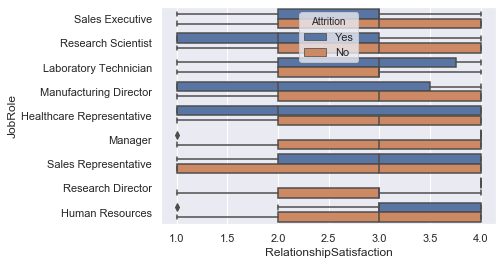

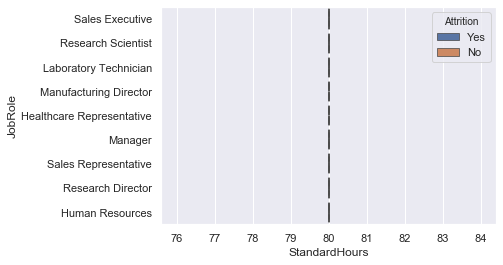

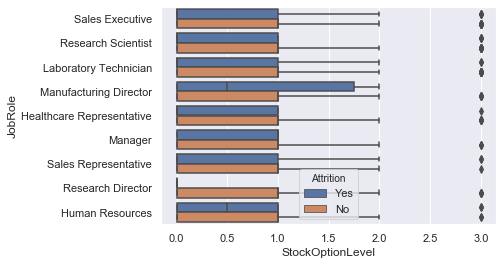

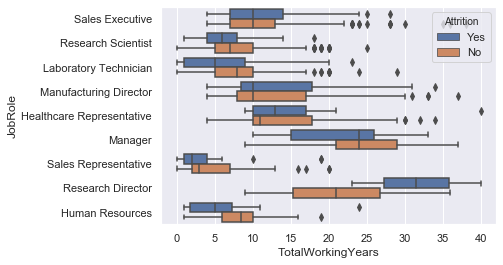

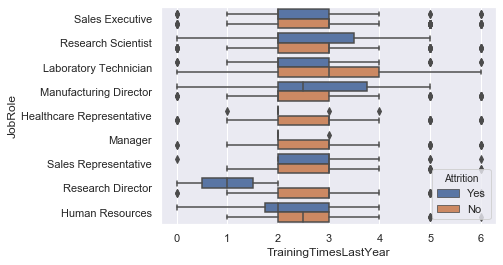

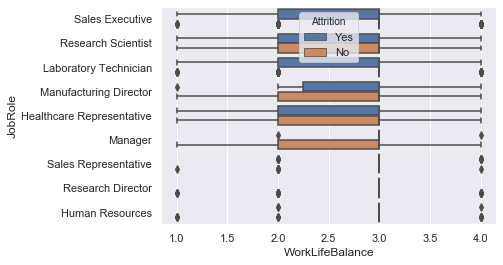

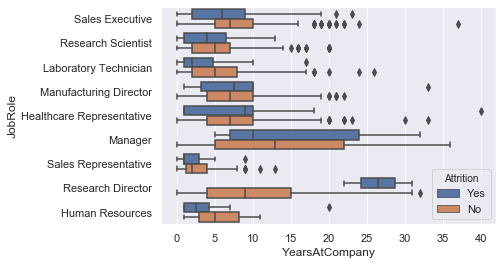

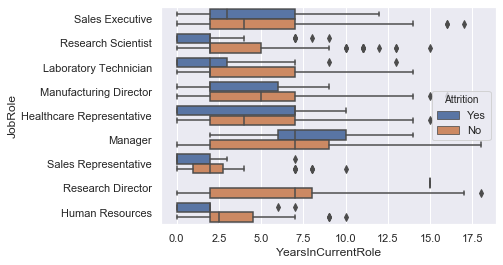

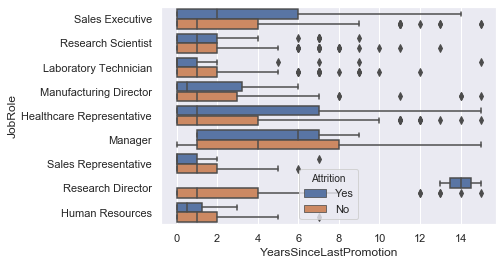

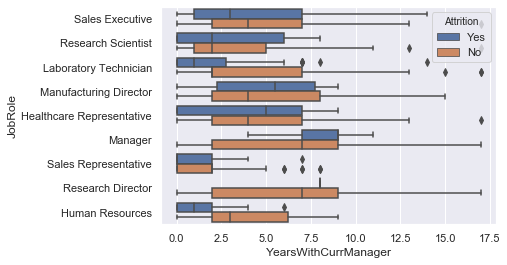

In [32]:
for i in df2:
    plt.figure()
    sns.boxplot(y ="JobRole", x =i, data = df, hue ="Attrition")
    plt.show()

In [33]:
table=pd.crosstab(df["JobRole"],df["Attrition"])
table

Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33

In [34]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [35]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(table) 

In [36]:
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 2.752481638050657e-15
Dependent (reject H0)


In [37]:
alpha>p

True

# p value Is 2.752481638050657e-15 Which Is Low Than Alpha .05 So We Can Clearly See That Null Hypo Fails And Alternate Wins Which Means  JobRole Have A Significant Relation

# Manipulation

# There Is No Null Values But There Are Some Outliers Which We Can Treat There

In [38]:
a=[]
for i in df2:
    q1, q3= np.percentile(df[i],[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
   # i,lower_bound,df3[i].min(),upper_bound,df3[i].max()
    if df[i].max()>upper_bound:
        a.append(i)
        print (i,"       ",df[i].max(),"           ",upper_bound)

MonthlyIncome         19999             16581.0
NumCompaniesWorked         9             8.5
PerformanceRating         4             3.0
StockOptionLevel         3             2.5
TotalWorkingYears         40             28.5
TrainingTimesLastYear         6             4.5
YearsAtCompany         40             18.0
YearsInCurrentRole         18             14.5
YearsSinceLastPromotion         15             7.5
YearsWithCurrManager         17             14.5


In [39]:
b=[]
for i in df["YearsWithCurrManager"]:
    if i>14.5:
        print (14.5)
        b.append(14.5)
    else:
        print (i)
        b.append(i)
df["YearsWithCurrManager"]=b

5
7
0
0
2
6
0
0
8
7
3
8
3
2
3
8
5
0
7
2
3
3
11
0
3
8
7
2
14.5
1
0
3
8
0
0
4
2
2
0
3
0
0
1
7
7
8
7
0
8
1
0
2
3
3
0
12
8
2
7
7
8
9
8
9
8
2
3
0
2
0
3
4
0
9
0
8
8
0
2
2
0
4
0
9
3
2
0
3
8
7
11
0
7
5
7
3
2
4
8
2
2
0
0
10
0
2
7
3
1
0
8
6
4
2
0
3
8
8
0
12
9
7
3
14.5
7
3
6
0
1
11
2
1
2
7
7
1
3
9
2
7
4
3
2
4
7
2
2
7
4
0
13
6
5
14.5
7
9
0
0
11
2
2
2
2
4
1
4
8
4
7
4
1
0
2
10
3
2
2
0
7
1
2
2
2
2
3
6
9
14.5
9
0
9
3
1
2
8
7
2
2
0
7
0
7
0
7
0
9
2
7
2
3
8
8
7
7
4
0
1
5
8
5
7
1
7
13
4
0
8
1
8
1
2
14.5
2
6
4
9
7
12
2
2
2
2
0
7
7
2
2
9
2
2
0
8
5
2
2
2
8
9
0
4
3
5
4
7
0
0
8
5
10
11
13
9
4
1
0
2
2
7
4
6
3
6
9
8
3
7
0
2
2
2
2
7
2
4
2
8
0
9
0
2
4
0
7
7
7
8
8
1
2
3
0
11
2
8
10
7
7
7
2
9
4
7
7
2
9
9
3
0
1
1
0
4
3
0
8
2
7
2
2
7
4
9
10
7
13
2
2
0
0
2
0
7
0
7
2
7
0
2
0
12
2
7
2
0
3
0
7
3
0
2
0
2
0
4
7
0
7
2
4
2
3
0
4
2
0
0
14.5
3
2
1
9
0
2
2
12
2
2
3
7
2
6
7
4
7
8
2
4
2
4
2
2
10
8
4
4
0
0
12
2
4
7
1
0
8
0
7
7
11
4
1
3
0
7
2
8
7
3
2
0
0
2
0
7
2
7
7
10
9
13
7
5
8
7
0
2
5
1
0
1
7
0
3
7
0
2
2
8
7
9
2
1
0
3
9
4
4
0
7
6

In [40]:
b=[]
for i in df["YearsSinceLastPromotion"]:
    if i>7.5:
        print (7.5)
        b.append(7.5)
    else:
        print (i)
        b.append(i)
df["YearsSinceLastPromotion"]=b

0
1
0
3
2
3
0
0
1
7
0
0
4
1
0
7.5
0
0
3
1
1
0
2
0
1
4
6
4
5
2
0
1
1
0
2
1
0
2
0
1
0
0
0
1
3
7.5
7.5
0
0
0
0
2
1
2
0
7.5
1
2
1
0
7
7.5
7.5
7
7.5
0
0
0
1
0
1
0
1
0
0
1
2
0
0
0
3
0
1
1
1
0
0
0
7.5
4
7.5
1
2
7.5
5
0
0
0
1
1
0
0
1
2
0
2
0
0
2
0
7.5
0
4
1
0
1
5
2
0
4
0
0
4
7.5
7
4
7.5
0
2
5
1
2
2
0
5
0
0
5
2
4
0
0
2
0
0
2
1
7
1
0
2
0
4
0
3
0
0
0
2
1
2
2
0
1
0
4
1
7
0
1
1
0
7
6
0
2
0
1
7.5
2
0
1
0
0
1
1
7.5
2
1
1
7.5
0
0
2
7.5
1
1
0
0
1
2
1
2
3
0
1
2
1
0
0
7.5
5
0
4
0
0
0
1
7.5
0
3
1
0
5
1
0
5
4
0
0
2
7.5
2
0
0
1
1
7.5
1
1
1
2
0
4
1
2
0
5
0
0
0
7.5
1
0
0
1
7
3
0
1
0
7
0
7
0
0
7
1
4
7.5
4
7.5
0
0
1
0
6
7
1
1
1
7.5
0
0
3
5
0
1
0
0
1
7
2
7
1
4
0
6
0
1
0
0
0
7
3
0
4
0
1
0
1
7.5
2
7.5
7.5
1
0
7
1
7.5
0
1
0
2
1
7.5
7.5
0
0
1
0
1
0
0
7.5
0
0
2
1
0
0
2
4
1
0
0
1
0
0
0
1
0
0
6
2
7
0
1
0
1
1
1
2
0
0
0
7
1
1
2
0
1
0
0
0
0
0
2
0
1
0
0
0
1
7.5
0
7.5
1
1
0
3
0
1
1
3
1
0
1
7.5
3
1
7
4
0
1
0
0
0
1
0
0
7.5
0
0
1
1
0
1
0
1
0
1
0
7
0
7.5
6
7.5
0
0
4
0
5
1
0
7
1
1
0
0
0
2
7.5
1
6
7
1
6
5
0
0
5
3
1
1
0
0
0
0
0
0


In [41]:
b=[]
for i in df["YearsInCurrentRole"]:
    if i>14.5:
        print (14.5)
        b.append(14.5)
    else:
        print (i)
        b.append(i)
df["YearsInCurrentRole"]=b

4
7
0
7
2
7
0
0
7
7
4
5
2
2
2
9
2
0
8
2
2
3
6
0
2
13
2
7
6
2
1
2
0
0
0
3
2
2
1
3
0
0
0
8
8
14.5
5
0
6
0
0
2
3
0
2
14
8
2
7
5
8
3
3
14.5
14
0
5
0
2
0
3
4
1
4
0
7
13
0
2
2
8
4
0
11
2
4
0
2
10
8
3
7
8
9
8
3
2
4
10
2
2
0
0
13
0
2
3
4
2
0
12
7
3
3
0
3
10
7
0
12
7
7
4
14.5
7
4
10
0
1
11
2
2
2
7
7
2
2
11
2
9
4
5
2
4
7
2
3
6
0
0
7
8
7
9
8
7
0
0
11
3
2
2
2
3
1
4
8
9
3
4
2
0
7
9
4
2
1
0
13
2
2
2
3
2
2
7
8
14.5
9
7
14.5
7
0
4
8
7
2
3
0
7
2
7
3
2
0
4
2
1
2
2
8
8
7
9
2
0
3
2
7
2
11
2
8
10
4
0
8
10
7
3
2
14.5
2
0
4
13
7
7
3
2
2
2
0
8
0
2
2
9
1
2
0
6
5
2
2
2
6
7
0
4
1
7
2
7
0
0
0
3
7
13
10
7
2
4
2
2
7
0
5
4
3
14.5
7
7
3
12
0
2
2
3
2
0
2
7
2
4
0
9
0
1
10
0
3
7
10
8
8
8
3
2
2
9
2
6
9
7
1
2
3
12
4
7
7
2
8
9
9
0
7
2
7
4
3
0
9
3
7
2
9
7
2
10
9
7
6
2
4
0
0
3
2
0
0
7
2
7
0
2
0
9
2
7
2
0
4
0
7
3
4
2
0
2
1
2
5
2
7
2
2
4
2
0
4
1
9
0
7
4
2
0
10
0
2
2
10
2
2
4
11
2
8
7
4
7
0
2
4
2
2
4
4
8
7
5
3
2
0
14.5
2
3
2
2
0
8
0
10
7
13
0
2
4
0
3
2
8
6
3
2
7
0
2
2
3
2
7
9
3
9
6
3
5
9
7
7
2
1
4
0
0
7
0
4
7
0
5
2
14.5
5
9
2
2

In [42]:
b=[]
for i in df["YearsAtCompany"]:
    if i>18.0:
        print (18.0)
        b.append(18.0)
    else:
        print (i)
        b.append(i)
df["YearsAtCompany"]=b

6
10
0
8
2
7
1
1
9
7
5
9
5
2
4
10
6
1
18.0
3
4
5
12
0
4
14
10
9
18.0
2
1
4
10
1
2
5
3
2
1
5
1
1
1
9
12
18.0
9
1
9
1
1
2
4
4
2
15
9
2
7
7
9
10
18.0
18.0
17
5
6
1
3
1
4
5
1
10
1
11
15
0
5
4
10
6
1
13
5
6
0
4
11
9
18.0
10
11
10
11
4
3
5
18.0
3
3
1
1
16
1
3
8
6
2
0
13
9
5
5
1
5
11
9
1
18.0
10
7
5
18.0
7
5
18.0
0
2
15
3
2
2
9
8
3
4
15
2
11
5
6
3
5
8
3
5
7
5
1
18.0
10
7
17
9
10
1
1
12
4
2
2
5
5
1
5
9
10
8
5
5
0
8
12
5
2
3
1
18.0
2
4
3
4
3
4
8
18.0
18.0
10
7
18.0
7
1
5
18.0
8
6
5
1
7
2
7
5
7
1
10
4
8
3
4
14
11
7
10
5
1
6
6
18.0
6
13
3
10
16
5
1
9
11
10
4
2
18.0
2
7
5
17
9
18.0
4
3
3
3
1
9
18.0
2
2
11
3
3
1
18.0
6
3
3
4
9
18.0
1
5
5
8
6
7
0
0
9
6
18.0
15
18.0
10
5
5
3
5
7
8
6
10
5
18.0
10
10
5
17
1
2
3
5
3
8
2
8
4
18.0
0
11
1
4
18.0
0
8
8
18
9
13
10
5
5
2
18.0
2
10
18.0
8
7
8
4
13
5
7
7
3
10
10
18.0
1
7
3
9
5
4
1
10
4
7
3
10
8
6
11
11
7
16
4
5
0
1
4
3
8
0
7
2
8
1
3
1
13
3
7
3
1
5
1
8
4
6
2
1
3
1
5
7
5
7
2
5
5
5
1
6
2
10
1
18
5
5
1
18.0
1
4
3
13
3
5
5
13
4
18.0
7
5
10
10
2
5
2
5
5
5
18.0
10
6
5

In [43]:
b=[]
for i in df["TrainingTimesLastYear"]:
    if i>4.5:
        print (4.5)
        b.append(4.5)
    else:
        print (i)
        b.append(i)
df["TrainingTimesLastYear"]=b

0
3
3
3
3
2
3
2
2
3
4.5
3
1
2
4
1
4.5
2
3
3
4.5
4
4
4.5
2
3
4.5
2
4
2
3
4.5
4.5
4.5
2
3
2
3
3
3
3
4.5
2
0
2
0
2
1
4
2
2
3
2
3
2
1
3
3
3
2
3
2
2
3
2
2
3
2
2
0
2
3
4
3
3
2
2
3
3
2
1
3
4
3
2
3
3
4
3
3
3
2
4
4.5
0
4.5
2
3
1
3
3
2
4.5
3
2
3
1
1
2
4.5
1
3
3
2
3
3
4.5
4.5
2
3
2
2
2
4.5
3
3
3
2
2
2
2
3
2
2
3
0
2
1
3
2
2
2
2
4
2
3
3
2
2
3
2
3
3
2
2
1
2
3
2
3
4.5
1
2
2
2
4.5
2
2
2
2
3
4.5
3
4
3
3
2
3
2
3
0
3
4.5
2
3
4.5
2
3
2
4.5
4.5
2
1
3
1
3
4.5
4.5
3
3
1
0
4
2
2
3
2
2
4.5
3
2
2
2
4.5
4.5
3
4.5
1
2
4
3
3
1
4.5
2
4.5
2
4.5
3
3
3
3
2
3
2
3
3
2
4.5
2
1
2
2
3
2
3
2
3
2
1
4.5
1
1
1
2
3
4
4.5
0
2
3
0
4.5
2
4.5
2
2
2
2
4
2
2
3
4.5
4
2
4.5
3
4.5
4
4.5
3
3
4
3
3
0
2
2
3
4
2
4.5
0
3
2
2
3
2
3
2
2
2
3
4.5
3
3
2
2
4
1
2
2
2
3
4.5
2
3
2
2
3
3
0
4
2
2
2
3
4.5
2
3
0
4
1
3
2
4
2
2
3
2
3
2
2
4.5
2
3
3
2
3
4.5
4
3
2
2
3
4.5
3
4.5
2
2
3
3
2
3
2
4.5
2
4.5
4.5
0
4
4.5
2
1
2
2
3
3
2
2
3
2
1
2
4
2
4.5
4.5
2
3
3
4
3
4.5
1
3
3
2
3
3
0
4.5
2
2
4.5
4
3
2
3
2
4.5
4.5
4
4
3
3
2
3
3
2
2
3
3
3
2
2
4.5
2
2
2
3
3
3
4.5
2
2
3


In [44]:
b=[]
for i in df["TotalWorkingYears"]:
    if i>28.5:
        print (28.5)
        b.append(28.5)
    else:
        print (i)
        b.append(i)
df["TotalWorkingYears"]=b

8
10
7
8
6
8
12
1
10
17
6
10
5
3
6
10
7
1
28.5
6
5
10
13
0
8
26
10
10
24
22
7
9
10
19
6
6
3
2
6
10
1
1
1
9
12
23
10
8
14
1
23
2
9
10
5
15
9
4
10
7
9
10
28.5
28
17
21
6
25
5
2
20
6
1
10
5
11
16
17
16
16
10
6
24
17
5
28.5
3
10
11
9
22
11
11
21
12
16
4
5
28.5
17
7
1
1
16
17
28.5
28
6
2
1
23
9
23
6
12
12
14
10
7
25
10
8
7
23
12
5
28.5
0
3
16
18
16
4
12
8
7
18
17
6
12
10
9
19
5
9
8
6
21
7
1
20
10
13
20
9
10
10
9
15
6
2
6
5
12
1
21
13
12
12
8
6
1
13
12
9
19
4
1
24
2
7
9
4
5
5
8
21
28.5
10
21
28.5
7
8
7
22
8
10
11
14
9
6
7
5
15
17
10
4
8
5
17
14
12
7
16
8
16
9
7
23
16
16
7
10
17
6
7
13
11
10
4
6
22
7
28.5
8
22
13
28.5
6
4
7
4
17
9
25
9
2
13
17
9
17
20
6
10
10
5
10
22
1
6
5
13
9
28
5
10
10
6
21
16
28.5
10
5
7
3
15
10
8
6
28
21
20
10
12
5
17
19
10
5
5
22
10
2
8
4
23
0
12
4
13
22
0
9
10
19
11
13
19
12
6
9
24
3
12
21
9
25
11
4
13
5
13
10
5
11
10
21
12
9
21
9
6
20
10
12
6
7
4
10
8
8
12
11
7
17
4
8
5
16
4
4
8
15
13
4
8
14
3
7
16
15
10
3
1
17
7
8
20
8
3
1
6
10
5
7
26
18
6
9
28.5
5
1
7
2
10
3
18
8
8


In [45]:
b=[]
for i in df["StockOptionLevel"]:
    if i>2.5:
        print (2.5)
        b.append(2.5)
    else:
        print (i)
        b.append(i)
df["StockOptionLevel"]=b

0
1
0
0
1
0
2.5
1
0
2
1
0
1
1
0
1
2
2
0
0
1
0
0
0
0
1
0
1
1
0
0
0
0
1
1
2
0
0
1
2
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
0
1
1
1
1
1
0
1
0
2.5
2.5
0
1
1
1
0
1
0
2
0
0
0
0
0
1
2
0
1
2.5
0
0
1
2
2.5
0
1
0
2.5
1
0
1
1
0
0
1
0
0
0
0
1
1
0
0
2
0
0
0
0
1
1
0
0
1
1
2
2.5
1
2.5
0
0
0
1
0
1
0
0
0
1
1
1
2
0
1
0
0
0
0
0
0
2.5
1
0
1
1
0
1
2
1
1
0
1
0
1
1
1
2
1
1
1
1
0
1
1
0
0
1
0
0
2
1
1
0
0
2.5
0
1
0
0
1
2
1
1
0
0
0
1
0
0
2.5
1
1
0
1
0
1
1
2
1
1
0
2.5
1
0
1
1
0
0
0
2
0
0
0
0
0
1
0
0
2.5
2
1
1
1
1
0
0
0
0
0
1
1
1
0
0
1
0
2.5
0
2
2
1
1
1
1
1
1
2
0
0
0
1
2
1
1
0
0
0
1
0
1
0
2
1
2
0
1
0
1
1
1
0
2
1
1
1
2
2.5
0
0
1
1
0
1
1
1
0
0
0
1
0
2.5
1
0
2
2
1
0
0
0
1
2.5
1
1
1
1
1
0
1
1
2
0
0
0
0
0
0
0
2.5
0
0
2
1
1
0
0
1
1
1
0
1
2
2.5
0
0
2.5
1
2
1
0
2
0
2
0
0
0
1
1
1
1
2
1
1
0
0
0
1
0
1
0
0
1
0
0
0
2
0
0
0
0
1
0
0
1
1
0
0
1
1
0
1
2
0
1
2
1
0
1
1
1
1
1
1
0
0
2
1
1
2.5
0
1
1
1
0
2
0
1
0
0
1
2.5
0
1
1
0
2
1
0
0
0
0
1
1
0
0
2.5
0
0
0
1
1
1
0
2.5
0
0
0
2.5
1
0
0
1
0
0
0
0
1
0
1
1
1
2
1
1
0
1
0
2
0
0
0
0
0
1
1
2
0
2
1
1
1
2


In [46]:
b=[]
for i in df["PerformanceRating"]:
    if i>3.0:
        print (3.0)
        b.append(3.0)
    else:
        print (i)
        b.append(i)
df["PerformanceRating"]=b

3
3.0
3
3
3
3
3.0
3.0
3.0
3
3
3
3
3
3
3
3
3
3
3
3
3.0
3
3
3
3
3.0
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3.0
3
3.0
3.0
3.0
3
3
3
3.0
3
3
3
3.0
3
3.0
3
3.0
3
3
3
3
3
3
3
3
3
3
3.0
3
3
3
3.0
3
3
3
3.0
3
3
3
3
3
3
3
3.0
3
3
3.0
3.0
3
3
3
3
3.0
3
3
3
3.0
3
3
3
3
3.0
3
3
3
3
3.0
3.0
3
3
3
3
3
3
3.0
3
3.0
3
3
3
3
3
3
3
3
3
3
3
3
3
3.0
3.0
3
3
3
3
3.0
3
3.0
3
3
3
3
3
3.0
3
3
3
3.0
3
3
3
3
3.0
3
3
3.0
3
3
3
3
3
3
3
3.0
3.0
3
3.0
3
3
3
3
3
3.0
3.0
3
3.0
3
3.0
3
3
3
3
3
3
3
3
3
3
3
3.0
3
3
3
3
3
3
3
3
3
3
3.0
3
3
3
3
3
3.0
3
3
3
3
3
3
3
3
3
3.0
3
3
3
3
3
3
3
3
3
3
3
3
3
3.0
3.0
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3.0
3
3
3
3
3
3
3
3
3.0
3
3
3
3
3
3.0
3
3
3
3
3
3.0
3
3
3
3
3.0
3.0
3
3
3.0
3
3
3
3
3.0
3
3
3.0
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3.0
3
3
3
3
3
3
3
3
3
3.0
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3.0
3
3
3
3.0
3
3
3
3
3
3.0
3
3.0
3
3
3
3
3
3
3
3
3
3
3.0
3
3
3
3
3
3
3.0
3
3
3.0
3
3
3
3
3
3.0
3
3
3
3.0
3
3
3
3
3
3
3
3
3
3
3
3.0
3
3
3.0
3
3
3
3
3
3.0
3
3.0
3
3
3
3
3
3
3
3
3


In [47]:
b=[]
for i in df["NumCompaniesWorked"]:
    if i>8.5:
        print (8.5)
        b.append(8.5)
    else:
        print (i)
        b.append(i)
df["NumCompaniesWorked"]=b

8
1
6
1
8.5
0
4
1
0
6
0
0
1
0
5
1
0
1
2
5
0
7
0
1
2
4
1
0
3
3
4
2
1
3
2
1
1
1
8.5
2
1
1
1
1
1
1
0
4
4
1
8.5
1
5
2
7
1
1
3
3
1
1
1
5
7
1
2
1
2
4
0
7
0
1
1
3
1
0
4
4
8
1
1
3
7
1
4
3
3
1
1
1
0
1
2
1
8.5
0
1
0
4
4
1
1
1
5
8.5
3
1
1
1
3
1
2
0
6
2
2
0
5
1
1
0
8.5
7
4
1
1
1
0
1
4
4
3
3
1
6
2
4
2
0
7
5
3
1
0
5
0
4
2
1
1
1
2
8
1
1
2
4
7
6
1
6
1
3
1
3
4
2
4
3
0
0
4
1
4
4
0
1
1
1
8
2
1
2
1
1
1
8
1
3
0
1
3
4
8.5
1
5
2
8.5
3
5
1
1
8
7
1
1
1
8.5
7
1
1
1
5
5
3
5
0
6
2
8
6
1
0
0
3
4
1
1
1
7
1
8
3
5
5
7
1
2
0
7
0
2
1
0
8.5
1
6
2
4
6
0
1
3
2
0
0
0
1
0
1
3
4
3
2
2
0
1
0
0
0
1
1
4
1
2
7
1
1
3
3
1
1
3
1
1
3
8.5
2
1
8.5
4
1
1
1
5
1
0
4
5
1
1
0
4
0
7
1
3
2
0
3
1
0
6
1
0
7
2
1
1
1
4
7
5
1
1
1
4
3
4
1
0
3
8
8.5
2
1
0
1
1
7
0
1
1
0
1
6
3
2
1
0
1
3
4
7
1
3
1
4
4
2
3
1
1
6
2
1
6
2
0
1
8.5
8.5
1
1
8
4
4
8
2
1
1
0
1
1
8.5
1
7
3
2
1
6
4
8.5
1
7
4
1
3
1
1
8.5
0
1
1
5
2
3
2
2
2
5
2
0
1
0
1
0
1
4
1
5
1
0
3
0
0
4
5
6
0
7
3
2
1
7
7
0
4
3
8.5
4
1
5
2
3
7
8.5
7
1
4
1
0
0
4
4
8.5
1
3
2
5
1
1
1
4
5
7
1
3
8
0
3
6
1
1
1
1
1
1


In [48]:
b=[]
for i in df["MonthlyIncome"]:
    if i>16581:
        print (16581)
        b.append(16581)
    else:
        print (i)
        b.append(i)
df["MonthlyIncome"]=b

5993
5130
2090
2909
3468
3068
2670
2693
9526
5237
2426
4193
2911
2661
2028
9980
3298
2935
15427
3944
4011
3407
11994
1232
2960
16581
3919
6825
10248
16581
2496
6465
2206
2086
2293
2645
2683
2014
3419
5376
1951
2341
2293
8726
4011
16581
4568
3022
5772
2269
5381
3441
5454
9884
4157
13458
9069
4014
5915
5993
6162
2406
16581
7637
10096
14756
6499
9724
2194
3388
5473
2703
2501
6220
3038
4424
4312
13245
13664
5021
5126
2859
10239
5329
4325
7260
2322
2075
4152
9619
13503
5441
5209
10673
5010
13549
4999
4221
13872
2042
2073
2956
2926
4809
5163
16581
16581
5744
2889
2871
7484
6074
16581
2774
4505
7428
11631
9738
2835
16581
2613
6146
4963
16581
6172
2368
10312
1675
2523
6567
4739
9208
4559
8189
2942
4941
10650
5902
8639
6347
4200
3452
4317
2632
4668
3204
2720
16581
2238
1483
5605
7295
2306
2348
8998
4319
6132
3346
10855
2231
2323
2024
2713
9439
2566
16581
2451
9419
8686
3038
3058
2325
2088
3072
5006
4257
2500
1102
10453
2288
3929
2311
3140
3690
4450
2756
16581
16581
9547
13734
16581
2279
5916
20

In [49]:
a=[]
for i in df2:
    q1, q3= np.percentile(df[i],[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
   # i,lower_bound,df3[i].min(),upper_bound,df3[i].max()
    if df[i].max()>upper_bound:
        a.append(i)
        print (i,"       ",df[i].max(),"           ",upper_bound)

# No Output Is Result That There Is No More Outlier Left

In [50]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [51]:
df1.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [52]:

df=pd.get_dummies(df,columns=['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],drop_first=True)
 

In [53]:
df

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41          1       1102                 1          2              1   
1      49          0        279                 8          1              1   
2      37          1       1373                 2          2              1   
3      33          0       1392                 3          4              1   
4      27          0        591                 2          1              1   
...   ...        ...        ...               ...        ...            ...   
1465   36          0        884                23          2              1   
1466   39          0        613                 6          1              1   
1467   27          0        155                 4          3              1   
1468   49          0       1023                 2          3              1   
1469   34          0        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2                        3          61               2   
2                  4                        4          92               2   
3                  5                        4          56               3   
4                  7                        1          40               3   
...              ...                      ...         ...             ...   
1465            2061                        3          41               4   
1466            2062                        4          42               2   
1467            2064                        2          87               4   
1468            2065                        4          63               2   
1469            2068                        2          82               4   

      JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0            2                4           5993        19479   
1            2                2           5130        24907   
2            1                3           2090         2396   
3            1                3           2909        23159   
4            1                2           3468        16632   
...        ...              ...            ...          ...   
1465         2                4           2571        12290   
1466         3                1           9991        21457   
1467         2                2           6142         5174   
1468         2                2           5390        13243   
1469         2                3           4404        10228   

      NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0                    8.0                 11                3.0   
1                    1.0                 23                3.0   
2                    6.0                 15                3.0   
3                    1.0                 11                3.0   
4                    8.5                 12                3.0   
...                  ...                ...                ...   
1465                 4.0                 17                3.0   
1466                 4.0                 15                3.0   
1467                 1.0                 20                3.0   
1468                 2.0                 14                3.0   
1469                 2.0                 12                3.0   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            1             80               0.0   
1                            4             80               1.0   
2                            2             80               0.0   
3                            3             80               0.0   
4                            4             80               1.0   
...                        ...            ...               ...   
1465                         3             80               1.0   
1466                         1             80 

In [54]:
df1

Attrition     BusinessTravel              Department EducationField  \
0          Yes      Travel_Rarely                   Sales  Life Sciences   
1           No  Travel_Frequently  Research & Development  Life Sciences   
2          Yes      Travel_Rarely  Research & Development          Other   
3           No  Travel_Frequently  Research & Development  Life Sciences   
4           No      Travel_Rarely  Research & Development        Medical   
...        ...                ...                     ...            ...   
1465        No  Travel_Frequently  Research & Development        Medical   
1466        No      Travel_Rarely  Research & Development        Medical   
1467        No      Travel_Rarely  Research & Development  Life Sciences   
1468        No  Travel_Frequently                   Sales        Medical   
1469        No      Travel_Rarely  Research & Development        Medical   

      Gender                    JobRole MaritalStatus Over18 OverTime  
0     Female            Sales Executive        Single      Y      Yes  
1       Male         Research Scientist       Married      Y       No  
2       Male      Laboratory Technician        Single      Y      Yes  
3     Female         Research Scientist       Married      Y      Yes  
4       Male      Laboratory Technician       Married      Y       No  
...      ...                        ...           ...    ...      ...  
1465    Male      Laboratory Technician       Married      Y       No  
1466    Male  Healthcare Representative       Married      Y       No  
1467    Male     Manufacturing Director       Married      Y      Yes  
1468    Male            Sales Executive       Married      Y       No  
1469    Male      Laboratory Technician       Married      Y       No  

[1470 rows x 9 columns]

# Model building in original data

In [55]:
x=df.drop(["Attrition"],axis=1)
y=df["Attrition"]

In [56]:
X=df.drop(["Attrition"],axis=1)
Y=df["Attrition"]

# By The Help Of Lassso We Filter Our Best Feature

In [58]:
## select features
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
ls=SelectFromModel(Lasso(alpha=0.005,random_state=0))
ls.fit(X,Y)
ls.get_support()
selected_feature=X.columns[(ls.get_support())]
print(selected_feature)
ls.get_support()


Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'Department_Research & Development', 'EducationField_Medical',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Laboratory Technician', 'JobRole_Sales Representative',
       'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')


array([ True,  True,  True, False, False, False,  True,  True,  True,
       False,  True, False, False,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False,  True, False,  True,  True,
       False,  True, False, False, False, False, False,  True, False,
        True,  True])

In [59]:
X=df[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Manufacturing Director', 'JobRole_Research Scientist',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes']]

# As We Seen Above There are  Very Few Yes data of attritation So We Need  To Balance It 

In [60]:
from imblearn.over_sampling import SMOTE
SMOTE().fit_resample(x,y)
X,Y = SMOTE().fit_resample(x, y)

In [63]:
X

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41       1102                 1          2              1   
1      49        279                 8          1              1   
2      37       1373                 2          2              1   
3      33       1392                 3          4              1   
4      27        591                 2          1              1   
...   ...        ...               ...        ...            ...   
2461   27       1178                 9          1              1   
2462   36        856                11          3              1   
2463   41       1064                10          3              1   
2464   31       1001                15          3              1   
2465   29        930                 6          2              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2                        3          61               2   
2                  4                        4          92               2   
3                  5                        4          56               3   
4                  7                        1          40               3   
...              ...                      ...         ...             ...   
2461             647                        3          49               2   
2462            1538                        2          63               2   
2463            1165                        3          95               2   
2464             399                        2          65               2   
2465            1344                        4          40               3   

      JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0            2                4           5993        19479   
1            2                2           5130        24907   
2            1                3           2090         2396   
3            1                3           2909        23159   
4            1                2           3468        16632   
...        ...              ...            ...          ...   
2461         1                2           3788         4637   
2462         2                2           4748         7720   
2463         1                2           2846        10935   
2464         2                3           4631        24357   
2465         1                2           3868         4736   

      NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0               8.000000                 11                3.0   
1               1.000000                 23                3.0   
2               6.000000                 15                3.0   
3               1.000000                 11                3.0   
4               8.500000                 12                3.0   
...                  ...                ...                ...   
2461            1.000000                 17                3.0   
2462            2.339957                 15                3.0   
2463            1.842069                 12                3.0   
2464            5.463987                 11                3.0   
2465            1.000000                 15                3.0   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            1             80          0.000000   
1                            4             80          1.000000   
2                            2             80          0.000000   
3                            3             80          0.000000   
4                            4             80          1.000000   
...                        ...            ...               ...   
2461                         2             80          0.572591   
2462                         1             80          1.169978   
2463                         3             80          0.000000   
2464                         3             8

In [64]:
Y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [65]:
X

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41       1102                 1          2              1   
1      49        279                 8          1              1   
2      37       1373                 2          2              1   
3      33       1392                 3          4              1   
4      27        591                 2          1              1   
...   ...        ...               ...        ...            ...   
2461   27       1178                 9          1              1   
2462   36        856                11          3              1   
2463   41       1064                10          3              1   
2464   31       1001                15          3              1   
2465   29        930                 6          2              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2                        3          61               2   
2                  4                        4          92               2   
3                  5                        4          56               3   
4                  7                        1          40               3   
...              ...                      ...         ...             ...   
2461             647                        3          49               2   
2462            1538                        2          63               2   
2463            1165                        3          95               2   
2464             399                        2          65               2   
2465            1344                        4          40               3   

      JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0            2                4           5993        19479   
1            2                2           5130        24907   
2            1                3           2090         2396   
3            1                3           2909        23159   
4            1                2           3468        16632   
...        ...              ...            ...          ...   
2461         1                2           3788         4637   
2462         2                2           4748         7720   
2463         1                2           2846        10935   
2464         2                3           4631        24357   
2465         1                2           3868         4736   

      NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0               8.000000                 11                3.0   
1               1.000000                 23                3.0   
2               6.000000                 15                3.0   
3               1.000000                 11                3.0   
4               8.500000                 12                3.0   
...                  ...                ...                ...   
2461            1.000000                 17                3.0   
2462            2.339957                 15                3.0   
2463            1.842069                 12                3.0   
2464            5.463987                 11                3.0   
2465            1.000000                 15                3.0   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            1             80          0.000000   
1                            4             80          1.000000   
2                            2             80          0.000000   
3                            3             80          0.000000   
4                            4             80          1.000000   
...                        ...            ...               ...   
2461                         2             80          0.572591   
2462                         1             80          1.169978   
2463                         3             80          0.000000   
2464                         3             8

In [66]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
2461    1
2462    1
2463    1
2464    1
2465    1
Name: Attrition, Length: 2466, dtype: int64

In [67]:

import statsmodels.api as sm
x1 = sm.add_constant(X)
results = sm.OLS(Y,x1).fit()
results.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     90.13
Date:                Thu, 27 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:08:00   Log-Likelihood:                -593.73
No. Observations:                2466   AIC:                             1277.
Df Residuals:                    2421   BIC:                             1539.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0015      0.001     -1.409      0.159      -0.003       0.001
DailyRate                         -3.671e-05    1.7e-05     -2.163      0.031      -7e-05   -3.43e-06
DistanceFromHome                      0.0037      0.001      4.409      0.000       0.002       0.005
Education                            -0.0124      0.007     -1.804      0.071      -0.026       0.001
EmployeeCount                         0.0003   1.04e-05     28.959      0.000       0.000       0.000
EmployeeNumber                     3.442e-06   1.14e-05      0.302      0.763   -1.89e-05    2.58e-05
EnvironmentSatisfaction              -0.0536      0.006     -8.820      0.000      -0.065      -0.042
HourlyRate                           -0.0002      0.000     -0.726      0.468      -0.001       0.000
JobInvolvement                       -0.0829      0.009     -9.309      0.000      -0.100      -0.065
JobLevel                             -0.0670      0.020     -3.268      0.001      -0.107      -0.027
JobSatisfaction                      -0.0489      0.006     -7.888      0.000      -0.061      -0.037
MonthlyIncome                      5.994e-06   5.45e-06      1.100      0.272   -4.69e-06    1.67e-05
MonthlyRate                        4.949e-07   8.98e-07      0.551      0.582   -1.27e-06    2.26e-06
NumCompaniesWorked                    0.0136      0.003      4.487      0.000       0.008       0.020
PercentSalaryHike                    -0.0046      0.002     -2.481      0.013      -0.008      -0.001
PerformanceRating                     0.0009   3.11e-05     28.959      0.000       0.001       0.001
RelationshipSatisfaction             -0.0327      0.006     -5.182      0.000      -0.045      -0.020
StandardHours                         0.0240      0.001     28.959      0.000       0.022       0.026
StockOptionLevel                     -0.0574      0.011     -5.240      0.000      -0.079      -0.036
TotalWorkingYears                    -0.0029      0.002     -1.389      0.165      -0.007       0.001
TrainingTimesLastYear                -0.0155      0.006     -2.494      0.013      -0.028      -0.003
WorkLifeBalance                      -0.0444      0.009     -4.919      0.000      -0.062      -0.027
YearsAtCompany                        0.0083      0.004      2.250      0.025       0.001       0.016
YearsInCurrentRole                   -0.0167      0.004     -4.572      0.000      -0.024      -0.010
YearsSinceLastPromotion               0.0238      0.004      6.696      0.000       0.017       0.031
YearsWithCurrManager                 -0.0117      0.004     -3.083      0.002      -0.019      -0.004
BusinessTravel_Travel_Frequently      0.0224      0.022      1.018      0.309      -0.021       0.065
BusinessTravel_Travel_R

In [68]:
Model = []
Accuracy = []
F1Score = []

In [69]:
#TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,Y_test = train_test_split(X,Y, test_size= 0.25, random_state = 0)

In [70]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report,f1_score
print(classification_report(Y_test, y_pred))
print()
print (pd. crosstab(Y_test, y_pred))
print ()
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc = roc_auc_score(Y_test, y_pred)
print('AUC: %.3f' % auc)
accuracy=classifier.score(X_test,Y_test)
print("accuracy","=",accuracy*100,"%")
print ()
scores = cross_val_score(classifier, X, Y, cv=10)
scores
print ("cross validation score","=",scores.mean()*100,"%")
Model.append('LogisticRegression')
F1Score.append(f1_score(Y_test, y_pred, average=None))
Accuracy.append(accuracy)

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       299
           1       0.67      0.73      0.70       318

    accuracy                           0.68       617
   macro avg       0.68      0.67      0.67       617
weighted avg       0.68      0.68      0.67       617


col_0        0    1
Attrition          
0          184  115
1           85  233

AUC: 0.674
accuracy = 67.58508914100486 %

cross validation score = 64.39814357657747 %


In [71]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report,f1_score
print(classification_report(Y_test, y_pred))
print()
print (pd. crosstab(Y_test, y_pred))
print ()
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc = roc_auc_score(Y_test, y_pred)
print('AUC: %.3f' % auc)
accuracy=classifier.score(X_test,Y_test)
print("accuracy","=",accuracy*100,"%")
print ()
scores = cross_val_score(classifier, X, Y, cv=10)
scores
print ("cross validation score","=",scores.mean()*100,"%")
Model.append('KNeighborsClassifier')
F1Score.append(f1_score(Y_test, y_pred, average=None))
Accuracy.append(accuracy)

              precision    recall  f1-score   support

           0       0.89      0.61      0.72       299
           1       0.71      0.93      0.81       318

    accuracy                           0.77       617
   macro avg       0.80      0.77      0.76       617
weighted avg       0.80      0.77      0.77       617


col_0        0    1
Attrition          
0          181  118
1           22  296

AUC: 0.768
accuracy = 77.3095623987034 %

cross validation score = 76.07682433099636 %


In [72]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report,f1_score
print(classification_report(Y_test, y_pred))
print()
print (pd. crosstab(Y_test, y_pred))
print ()
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc = roc_auc_score(Y_test, y_pred)
print('AUC: %.3f' % auc)
accuracy=classifier.score(X_test,Y_test)
print("accuracy","=",accuracy*100,"%")
print ()
scores = cross_val_score(classifier, X, Y, cv=10)
scores
print ("cross validation score","=",scores.mean()*100,"%")
Model.append('GaussianNB')
F1Score.append(f1_score(Y_test, y_pred, average=None))
Accuracy.append(accuracy)

              precision    recall  f1-score   support

           0       0.82      0.60      0.69       299
           1       0.70      0.88      0.78       318

    accuracy                           0.74       617
   macro avg       0.76      0.74      0.74       617
weighted avg       0.76      0.74      0.74       617


col_0        0    1
Attrition          
0          178  121
1           38  280

AUC: 0.738
accuracy = 74.23014586709886 %

cross validation score = 73.44080181692506 %


In [73]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report,f1_score
print(classification_report(Y_test, y_pred))
print()
print (pd. crosstab(Y_test, y_pred))
print ()
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc = roc_auc_score(Y_test, y_pred)
print('AUC: %.3f' % auc)
accuracy=classifier.score(X_test,Y_test)
print("accuracy","=",accuracy*100,"%")
print ()
scores = cross_val_score(classifier, X, Y, cv=10)
scores
print ("cross validation score","=",scores.mean()*100,"%")
Model.append('DecisionTreeClassifier')
F1Score.append(f1_score(Y_test, y_pred, average=None))
Accuracy.append(accuracy)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       299
           1       0.86      0.85      0.85       318

    accuracy                           0.85       617
   macro avg       0.85      0.85      0.85       617
weighted avg       0.85      0.85      0.85       617


col_0        0    1
Attrition          
0          254   45
1           47  271

AUC: 0.851
accuracy = 85.08914100486223 %

cross validation score = 83.14012047003061 %


In [74]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report,f1_score
print(classification_report(Y_test, y_pred))
print()
print (pd. crosstab(Y_test, y_pred))
print ()
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc = roc_auc_score(Y_test, y_pred)
print('AUC: %.3f' % auc)
accuracy=classifier.score(X_test,Y_test)
print("accuracy","=",accuracy*100,"%")
print ()
scores = cross_val_score(classifier, X, Y, cv=10)
scores
print ("cross validation score","=",scores.mean()*100,"%")
Model.append('RandomForestClassifier')
F1Score.append(f1_score(Y_test, y_pred, average=None))
Accuracy.append(accuracy)

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       299
           1       0.93      0.86      0.89       318

    accuracy                           0.89       617
   macro avg       0.90      0.90      0.89       617
weighted avg       0.90      0.89      0.89       617


col_0        0    1
Attrition          
0          279   20
1           45  273

AUC: 0.896
accuracy = 89.46515397082658 %

cross validation score = 89.38448372337973 %


In [75]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model
classifier = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed: 18.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [76]:
grid_search.best_score_
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [77]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(**grid_search.best_params_)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report,f1_score
print(classification_report(Y_test, y_pred))
print()
print (pd. crosstab(Y_test, y_pred))
print ()
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc = roc_auc_score(Y_test, y_pred)
print('AUC: %.3f' % auc)
accuracy=classifier.score(X_test,Y_test)
print("accuracy","=",accuracy*100,"%")
print ()
scores = cross_val_score(classifier, X, Y, cv=10)
scores
print ("cross validation score","=",scores.mean()*100,"%")
Model.append('RandomForestClassifier "hpt"')
F1Score.append(f1_score(Y_test, y_pred, average=None))
Accuracy.append(accuracy)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       299
           1       0.96      0.86      0.91       318

    accuracy                           0.91       617
   macro avg       0.92      0.92      0.91       617
weighted avg       0.92      0.91      0.91       617


col_0        0    1
Attrition          
0          289   10
1           43  275

AUC: 0.916
accuracy = 91.41004862236629 %

cross validation score = 90.76445804943877 %


In [84]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report,f1_score
print(classification_report(Y_test, y_pred))
print()
print (pd. crosstab(Y_test, y_pred))
print ()
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc = roc_auc_score(Y_test, y_pred)
print('AUC: %.3f' % auc)
accuracy=classifier.score(X_test,Y_test)
print("accuracy","=",accuracy*100,"%")
print ()
scores = cross_val_score(classifier, X, Y, cv=10)
scores
print ("cross validation score","=",scores.mean()*100,"%")
Model.append('ExtraTreesClassifier')
F1Score.append(f1_score(Y_test, y_pred, average=None))
Accuracy.append(accuracy)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       299
           1       0.97      0.87      0.91       318

    accuracy                           0.92       617
   macro avg       0.92      0.92      0.92       617
weighted avg       0.92      0.92      0.92       617


col_0        0    1
Attrition          
0          289   10
1           42  276

AUC: 0.917
accuracy = 91.57212317666126 %

cross validation score = 91.17013923175668 %


In [79]:
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'verbose': 0
}

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(**gb_params)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report,f1_score
print(classification_report(Y_test, y_pred))
print()
print (pd. crosstab(Y_test, y_pred))
print ()
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc = roc_auc_score(Y_test, y_pred)
print('AUC: %.3f' % auc)
accuracy=classifier.score(X_test,Y_test)
print("accuracy","=",accuracy*100,"%")
print ()
scores = cross_val_score(classifier, X, Y, cv=10)
scores
print ("cross validation score","=",scores.mean()*100,"%")
Model.append('GradientBoostingClassifier')
F1Score.append(f1_score(Y_test, y_pred, average=None))
Accuracy.append(accuracy)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       299
           1       0.97      0.86      0.91       318

    accuracy                           0.92       617
   macro avg       0.92      0.92      0.92       617
weighted avg       0.92      0.92      0.92       617


col_0        0    1
Attrition          
0          291    8
1           44  274

AUC: 0.917
accuracy = 91.57212317666126 %

cross validation score = 85.08097165991903 %


In [81]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print()
print (pd. crosstab(Y_test, y_pred))
print ()
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc = roc_auc_score(Y_test, y_pred)
print('AUC: %.3f' % auc)
accuracy=classifier.score(X_test,Y_test)
print("accuracy","=",accuracy*100,"%")
print ()
scores = cross_val_score(classifier, X, Y, cv=10)
scores
print ("cross validation score","=",scores.mean()*100,"%")
Model.append('SVC')
F1Score.append(f1_score(Y_test, y_pred, average=None))
Accuracy.append(accuracy)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       299
           1       0.88      0.83      0.85       318

    accuracy                           0.85       617
   macro avg       0.86      0.85      0.85       617
weighted avg       0.86      0.85      0.85       617


col_0        0    1
Attrition          
0          264   35
1           55  263

AUC: 0.855
accuracy = 85.41329011345219 %

cross validation score = 83.33876435930352 %


In [106]:
from sklearn.ensemble import AdaBoostClassifier 
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print()
print (pd. crosstab(Y_test, y_pred))
print ()
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc = roc_auc_score(Y_test, y_pred)
print('AUC: %.3f' % auc)
accuracy=classifier.score(X_test,Y_test)
print("accuracy","=",accuracy*100,"%")
print ()
scores = cross_val_score(classifier, X, Y, cv=10)
scores
print ("AdaBoostClassifier","=",scores.mean()*100,"%")
Model.append('SVC')
F1Score.append(f1_score(Y_test, y_pred, average=None))
Accuracy.append(accuracy)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       299
           1       0.92      0.88      0.90       318

    accuracy                           0.90       617
   macro avg       0.90      0.90      0.90       617
weighted avg       0.90      0.90      0.90       617


col_0        0    1
Attrition          
0          274   25
1           37  281

AUC: 0.900
accuracy = 89.9513776337115 %

AdaBoostClassifier = 79.72054902735263 %


In [101]:
import xgboost
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print()
print (pd. crosstab(Y_test, y_pred))
print ()
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc = roc_auc_score(Y_test, y_pred)
print('AUC: %.3f' % auc)
accuracy=classifier.score(X_test,Y_test)
print("accuracy","=",accuracy*100,"%")
print ()
scores = cross_val_score(classifier, X, Y, cv=10)
scores
print ("cross validation score","=",scores.mean()*100,"%")
Model.append('XGBClassifier')
F1Score.append(f1_score(Y_test, y_pred, average=None))
Accuracy.append(accuracy)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       299
           1       0.95      0.88      0.91       318

    accuracy                           0.91       617
   macro avg       0.92      0.92      0.91       617
weighted avg       0.92      0.91      0.91       617


col_0        0    1
Attrition          
0          285   14
1           39  279

AUC: 0.915
accuracy = 91.41004862236629 %

cross validation score = 83.62414008755472 %


In [108]:
final_result=pd.DataFrame({'Model':Model,'Accuracy':Accuracy, 'F1Score':F1Score})
final_result.sort_values(by=["Accuracy"], inplace=True)
final_result

Model  Accuracy  \
0             LogisticRegression  0.675851   
2                     GaussianNB  0.742301   
1           KNeighborsClassifier  0.773096   
3         DecisionTreeClassifier  0.850891   
8                            SVC  0.854133   
12                 XGBClassifier  0.878444   
15                           SVC  0.889789   
4         RandomForestClassifier  0.894652   
14                           SVC  0.899514   
17                           SVC  0.899514   
6           ExtraTreesClassifier  0.905997   
5   RandomForestClassifier "hpt"  0.914100   
16                           SVC  0.914100   
10                           SVC  0.914100   
11                 XGBClassifier  0.914100   
13                 XGBClassifier  0.914100   
7     GradientBoostingClassifier  0.915721   
9           ExtraTreesClassifier  0.915721   

                                     F1Score  
0    [0.647887323943662, 0.6996996996996996]  
2   [0.6912621359223302, 0.7788595271210014]  
1   [0.7211155378486056, 0.8087431693989071]  
3   [0.8466666666666667, 0.8548895899053628]  
8   [0.8543689320388349, 0.8538961038961039]  
12   [0.882260596546311, 0.8743718592964823]  
15  [0.8927444794952681, 0.8866666666666667]  
4   [0.8956661316211878, 0.8936170212765957]  
14  [0.8983606557377048, 0.9006410256410257]  
17  [0.8983606557377048, 0.9006410256410257]  
6   [0.9082278481012659, 0.9036544850498339]  
5   [0.9160063391442156, 0.9121061359867331]  
16              [0.9152, 0.9129720853858785]  
10  [0.9149277688603531, 0.9132569558101473]  
11  [0.9149277688603531, 0.9132569558101473]  
13  [0.9149277688603531, 0.9132569558101473]  
7    [0.917981072555205, 0.9133333333333333]  
9   [0.9174603174603174, 0.9139072847682119]

# Conclusion

I would like to preffer "ExtraTreesClassifier"  because it has low variance in cv and high accuracy